# Epsilon AI Cirtificated Data Science Professional - Mid Project
## US Airline Flights Delay Analysis
## Done By: Mohamed Momen

Real-world datasets are often noisy, incomplete, and inconsistent. This project focuses on analyzing a large-scale US Airline Flights dataset to explore flight delays and operational patterns across airlines, airports, and routes.

The dataset contains more than 1,000,000 records, including flight schedules, arrival and departure delays, carriers, and airport information. The goal of this project is to apply data cleaning, preprocessing, feature engineering, and exploratory data analysis (EDA) techniques to extract meaningful insights and answer real-world business questions related to airline performance.

Github Repo:

LinkedIn Post:

Questions To Answer By Analysis:
1. Which airlines have the worst average arrival delays?
2. Which airlines are the most reliable?
3. Which day of the week has the highest delays?
4. Do late departures strongly impact arrival delays?
5. Are longer flights more likely to be delayed?
6. Which origin airports contribute the most to delays?
7. How accurate is the delay labeling (IS_DELAYED)?
8. At which departure periods are flights most likely to be delayed?
9. How do delays vary across the week and weekends?
10. Do high-frequency routes suffer more delays?

Question To Answer Visually:
1. What does the overall arrival delay distribution look like?
2. How frequent are delayed vs on-time flights?
3. How severe are delays when they happen?
4. How severe are arrival delays compared to departure delays?
5. Which airlines have the highest average arrival delay?
6. Does departure delay predict arrival delay?
7. How does flight duration affect arrival delay?
8. How do delays change throughout the day?
9. Which time of day has the most delays?
10. Are weekends worse than weekdays?
11. Which day of the week has the highest delays?
12. Do busy routes experience more delays?
13. How does airline performance vary across delay levels?
14. Which origin airports have the worst departure delays?
15. What factors most strongly influence arrival delay?

## Preparing Libraries and Dataset:

### Install Necessary Libraries:

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import streamlit as st
import plotly.io as pio
import plotly.express as px

### Read The Dataset File:

In [204]:
df = pd.read_csv("Airline_dataset.csv")
df

,Unnamed: 0,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_SEQ_ID,ORIGIN_AIRPORT,DEST_SEQ_ID,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,WEATHER_DELAY
0,0,8/1/18,19805.0,N956AN,1587.0,1247805.0,JFK,1410702.0,PHX,1649.0,9.0,2006.0,44.0,0.000000
1,1,8/1/18,19805.0,N973AN,1588.0,1410702.0,PHX,1161802.0,EWR,1541.0,29.0,2350.0,53.0,0.000000
2,2,8/1/18,19805.0,N9006,1590.0,1104205.0,CLE,1129806.0,DFW,741.0,-3.0,938.0,-2.0,4.030195
3,3,8/1/18,19805.0,N870NN,1591.0,1484306.0,SJU,1129806.0,DFW,944.0,44.0,1347.0,43.0,0.000000
4,4,8/1/18,19805.0,N9023N,1593.0,1042302.0,AUS,1330303.0,MIA,556.0,-4.0,951.0,-2.0,4.030195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,1226363,1/5/20,19977.0,N66831,1598.0,1477104.0,SFO,1449202.0,RDU,2257.0,-3.0,642.0,-18.0,4.030195
1204821,1226364,1/5/20,19977.0,N57111,1597.0,1161802.0,EWR,1393007.0,ORD,628.0,13.0,751.0,0.0,4.030195
1204822,1226365,1/5/20,19977.0,N34455,1592.0,1226603.0,IAH,1226402.0,IAD,729.0,-1.0,1124.0,-1.0,4.030195
1204823,1226366,1/5/20,19977.0,N16234,1591.0,1129202.0,DEN,1530402.0,TPA,756.0,-1.0,1302.0,-18.0,4.030195


### Show Informations about Columns:

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Unnamed: 0      1204825 non-null  int64  
 1   FL_DATE         1204825 non-null  object 
 2   AIRLINE_ID      1204825 non-null  float64
 3   TAIL_NUM        1204825 non-null  object 
 4   FLIGHT_NUM      1204825 non-null  float64
 5   ORIGIN_SEQ_ID   1204825 non-null  float64
 6   ORIGIN_AIRPORT  1204825 non-null  object 
 7   DEST_SEQ_ID     1204825 non-null  float64
 8   DEST_AIRPORT    1204825 non-null  object 
 9   DEP_TIME        1204825 non-null  float64
 10  DEP_DELAY       1204247 non-null  float64
 11  ARR_TIME        1204825 non-null  float64
 12  ARR_DELAY       1201443 non-null  float64
 13  WEATHER_DELAY   1204825 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 128.7+ MB


In [206]:
df.isnull().sum()

Unnamed: 0           0
FL_DATE              0
AIRLINE_ID           0
TAIL_NUM             0
FLIGHT_NUM           0
ORIGIN_SEQ_ID        0
ORIGIN_AIRPORT       0
DEST_SEQ_ID          0
DEST_AIRPORT         0
DEP_TIME             0
DEP_DELAY          578
ARR_TIME             0
ARR_DELAY         3382
WEATHER_DELAY        0
dtype: int64

From these informations we can conclude that columns [DEP_DELAY,ARR_DELAY] have null values

## Data Preprocessing:

Column dictionary:

- Unnamed: 0 → Serial Number

- FL_DATE → The date of the flight

- AIRLINE_ID → An identification number assigned by US DOT to identify a unique airline (carrier)

- TAIL_NUM → An identification number to store the tail number of the airlines (Aircraft Number)

- FLIGHT_NUM → The flight number is stored in form of unique value for each flight.

- ORIGIN_SEQ_ID → Unique id for storing each origin airport of the flight.

- ORIGIN_AIRPORT → Stores the origin airport (e.g., ATL, JFK)

- DEST_SEQ_ID → Unique id for storing each destination airport of the flight.

- DEST_AIRPORT → Stores the destination airport

- DEP_TIME → Actual Departure Time in local time: hhmm  (e.g., 556 = 05:56)

- DEP_DELAY → Difference between scheduled and actual departure time in minutes (negative = early)

- ARR_TIME → Actual Departure Time in local time: hhmm 

- ARR_DELAY → Difference between scheduled and actual arrival time in minutes (negative = early)

- WEATHER_DELAY → The delay due to weather time in minutes

### 1. Drop Unecessary Columns:

a. "Unnamed: 0" Column is the same index column so we can just drop it.

In [207]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_SEQ_ID,ORIGIN_AIRPORT,DEST_SEQ_ID,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,WEATHER_DELAY
0,8/1/18,19805.0,N956AN,1587.0,1247805.0,JFK,1410702.0,PHX,1649.0,9.0,2006.0,44.0,0.000000
1,8/1/18,19805.0,N973AN,1588.0,1410702.0,PHX,1161802.0,EWR,1541.0,29.0,2350.0,53.0,0.000000
2,8/1/18,19805.0,N9006,1590.0,1104205.0,CLE,1129806.0,DFW,741.0,-3.0,938.0,-2.0,4.030195
3,8/1/18,19805.0,N870NN,1591.0,1484306.0,SJU,1129806.0,DFW,944.0,44.0,1347.0,43.0,0.000000
4,8/1/18,19805.0,N9023N,1593.0,1042302.0,AUS,1330303.0,MIA,556.0,-4.0,951.0,-2.0,4.030195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,1/5/20,19977.0,N66831,1598.0,1477104.0,SFO,1449202.0,RDU,2257.0,-3.0,642.0,-18.0,4.030195
1204821,1/5/20,19977.0,N57111,1597.0,1161802.0,EWR,1393007.0,ORD,628.0,13.0,751.0,0.0,4.030195
1204822,1/5/20,19977.0,N34455,1592.0,1226603.0,IAH,1226402.0,IAD,729.0,-1.0,1124.0,-1.0,4.030195
1204823,1/5/20,19977.0,N16234,1591.0,1129202.0,DEN,1530402.0,TPA,756.0,-1.0,1302.0,-18.0,4.030195


b. The Columns ["ORIGIN_SEQ_ID", "DEST_SEQ_ID"] are the same as Columns ["ORIGIN_AIRPORT", "DEST_AIRPORT"] Respectively.
- ID Columns Describe the Airport as sequence ID
- AIRPORT Columns Describe the Airport as Airport Code
- So we can just drop ["ORIGIN_SEQ_ID", "DEST_SEQ_ID"] Columns

In [208]:
df.drop(["ORIGIN_SEQ_ID", "DEST_SEQ_ID"], axis = 1, inplace = True)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,WEATHER_DELAY
0,8/1/18,19805.0,N956AN,1587.0,JFK,PHX,1649.0,9.0,2006.0,44.0,0.000000
1,8/1/18,19805.0,N973AN,1588.0,PHX,EWR,1541.0,29.0,2350.0,53.0,0.000000
2,8/1/18,19805.0,N9006,1590.0,CLE,DFW,741.0,-3.0,938.0,-2.0,4.030195
3,8/1/18,19805.0,N870NN,1591.0,SJU,DFW,944.0,44.0,1347.0,43.0,0.000000
4,8/1/18,19805.0,N9023N,1593.0,AUS,MIA,556.0,-4.0,951.0,-2.0,4.030195
...,...,...,...,...,...,...,...,...,...,...,...
1204820,1/5/20,19977.0,N66831,1598.0,SFO,RDU,2257.0,-3.0,642.0,-18.0,4.030195
1204821,1/5/20,19977.0,N57111,1597.0,EWR,ORD,628.0,13.0,751.0,0.0,4.030195
1204822,1/5/20,19977.0,N34455,1592.0,IAH,IAD,729.0,-1.0,1124.0,-1.0,4.030195
1204823,1/5/20,19977.0,N16234,1591.0,DEN,TPA,756.0,-1.0,1302.0,-18.0,4.030195


c. The WEATHER_DELAY column represents the portion of flight delay attributed specifically to weather conditions.
- However, an unusually frequent constant value (4.030195) was observed, which does not represent a realistic delay duration.
- This value was treated as an invalid placeholder and replaced with missing values to prevent misleading analysis.

In [209]:
df["WEATHER_DELAY"].value_counts(dropna=False)

WEATHER_DELAY
4.030195      1047611
0.000000       145665
8.000000          260
2.000000          246
10.000000         240
               ...   
273.000000          1
890.000000          1
545.000000          1
706.000000          1
289.000000          1
Name: count, Length: 444, dtype: int64

In [210]:
df["WEATHER_DELAY"] = df["WEATHER_DELAY"].round(6)
df["WEATHER_DELAY"] = df["WEATHER_DELAY"].replace(4.030195, np.nan)
df["WEATHER_DELAY"].value_counts(dropna=False)

WEATHER_DELAY
NaN      1047611
0.0       145665
8.0          260
2.0          246
10.0         240
          ...   
273.0          1
890.0          1
545.0          1
706.0          1
289.0          1
Name: count, Length: 444, dtype: int64

In [211]:
df.isnull().sum()

FL_DATE                 0
AIRLINE_ID              0
TAIL_NUM                0
FLIGHT_NUM              0
ORIGIN_AIRPORT          0
DEST_AIRPORT            0
DEP_TIME                0
DEP_DELAY             578
ARR_TIME                0
ARR_DELAY            3382
WEATHER_DELAY     1047611
dtype: int64

In [212]:
(df.isna().sum() / df.shape[0]) * 100

FL_DATE            0.000000
AIRLINE_ID         0.000000
TAIL_NUM           0.000000
FLIGHT_NUM         0.000000
ORIGIN_AIRPORT     0.000000
DEST_AIRPORT       0.000000
DEP_TIME           0.000000
DEP_DELAY          0.047974
ARR_TIME           0.000000
ARR_DELAY          0.280705
WEATHER_DELAY     86.951300
dtype: float64

- 87% Null Values Is a Very Huge Number So It Is Better To Drop The Whole Column

In [213]:
df.drop(["WEATHER_DELAY"], axis = 1, inplace = True)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY
0,8/1/18,19805.0,N956AN,1587.0,JFK,PHX,1649.0,9.0,2006.0,44.0
1,8/1/18,19805.0,N973AN,1588.0,PHX,EWR,1541.0,29.0,2350.0,53.0
2,8/1/18,19805.0,N9006,1590.0,CLE,DFW,741.0,-3.0,938.0,-2.0
3,8/1/18,19805.0,N870NN,1591.0,SJU,DFW,944.0,44.0,1347.0,43.0
4,8/1/18,19805.0,N9023N,1593.0,AUS,MIA,556.0,-4.0,951.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
1204820,1/5/20,19977.0,N66831,1598.0,SFO,RDU,2257.0,-3.0,642.0,-18.0
1204821,1/5/20,19977.0,N57111,1597.0,EWR,ORD,628.0,13.0,751.0,0.0
1204822,1/5/20,19977.0,N34455,1592.0,IAH,IAD,729.0,-1.0,1124.0,-1.0
1204823,1/5/20,19977.0,N16234,1591.0,DEN,TPA,756.0,-1.0,1302.0,-18.0


### 2. Handling Datatypes

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   FL_DATE         1204825 non-null  object 
 1   AIRLINE_ID      1204825 non-null  float64
 2   TAIL_NUM        1204825 non-null  object 
 3   FLIGHT_NUM      1204825 non-null  float64
 4   ORIGIN_AIRPORT  1204825 non-null  object 
 5   DEST_AIRPORT    1204825 non-null  object 
 6   DEP_TIME        1204825 non-null  float64
 7   DEP_DELAY       1204247 non-null  float64
 8   ARR_TIME        1204825 non-null  float64
 9   ARR_DELAY       1201443 non-null  float64
dtypes: float64(6), object(4)
memory usage: 91.9+ MB


a. Handling FL_DATE Column

In [215]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"], format="%m/%d/%y", errors="coerce")
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY
0,2018-08-01,19805.0,N956AN,1587.0,JFK,PHX,1649.0,9.0,2006.0,44.0
1,2018-08-01,19805.0,N973AN,1588.0,PHX,EWR,1541.0,29.0,2350.0,53.0
2,2018-08-01,19805.0,N9006,1590.0,CLE,DFW,741.0,-3.0,938.0,-2.0
3,2018-08-01,19805.0,N870NN,1591.0,SJU,DFW,944.0,44.0,1347.0,43.0
4,2018-08-01,19805.0,N9023N,1593.0,AUS,MIA,556.0,-4.0,951.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977.0,N66831,1598.0,SFO,RDU,2257.0,-3.0,642.0,-18.0
1204821,2020-01-05,19977.0,N57111,1597.0,EWR,ORD,628.0,13.0,751.0,0.0
1204822,2020-01-05,19977.0,N34455,1592.0,IAH,IAD,729.0,-1.0,1124.0,-1.0
1204823,2020-01-05,19977.0,N16234,1591.0,DEN,TPA,756.0,-1.0,1302.0,-18.0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   FL_DATE         1204825 non-null  datetime64[ns]
 1   AIRLINE_ID      1204825 non-null  float64       
 2   TAIL_NUM        1204825 non-null  object        
 3   FLIGHT_NUM      1204825 non-null  float64       
 4   ORIGIN_AIRPORT  1204825 non-null  object        
 5   DEST_AIRPORT    1204825 non-null  object        
 6   DEP_TIME        1204825 non-null  float64       
 7   DEP_DELAY       1204247 non-null  float64       
 8   ARR_TIME        1204825 non-null  float64       
 9   ARR_DELAY       1201443 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 91.9+ MB


b. Handling AIRLINE_ID, FLIGHT_NUM Columns

In [217]:
def get_decimals (col):
    """
    This Function Takes The Column And
    Get All The Reminder Values (Decimal Values) 
    Of All The Elements In The Column
    """
    reminders = []
    for num in col:
        try:
            reminder = num * 10 % 10
        except:
            reminder = num
        if reminder not in reminders:
            reminders.append(reminder)
    return reminders

In [218]:
ID_cols = ["AIRLINE_ID", "FLIGHT_NUM"]
for col in ID_cols:
    print(f"{col} : {get_decimals(df[col].unique())}")

AIRLINE_ID : [np.float64(0.0)]
FLIGHT_NUM : [np.float64(0.0)]


- Since All The Number Are Integers (.0) We Can Change The Datatype Safely To "Int" Then To "String"

In [219]:
for col in ID_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64").astype("string")
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,1649.0,9.0,2006.0,44.0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,1541.0,29.0,2350.0,53.0
2,2018-08-01,19805,N9006,1590,CLE,DFW,741.0,-3.0,938.0,-2.0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,944.0,44.0,1347.0,43.0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,556.0,-4.0,951.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,2257.0,-3.0,642.0,-18.0
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,628.0,13.0,751.0,0.0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,729.0,-1.0,1124.0,-1.0
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,756.0,-1.0,1302.0,-18.0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   FL_DATE         1204825 non-null  datetime64[ns]
 1   AIRLINE_ID      1204825 non-null  string        
 2   TAIL_NUM        1204825 non-null  object        
 3   FLIGHT_NUM      1204825 non-null  string        
 4   ORIGIN_AIRPORT  1204825 non-null  object        
 5   DEST_AIRPORT    1204825 non-null  object        
 6   DEP_TIME        1204825 non-null  float64       
 7   DEP_DELAY       1204247 non-null  float64       
 8   ARR_TIME        1204825 non-null  float64       
 9   ARR_DELAY       1201443 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3), string(2)
memory usage: 91.9+ MB


c. Handling DEP_TIME, ARR_TIME Columns

In [221]:
time_cols = ["DEP_TIME","DEP_DELAY","ARR_TIME", "ARR_DELAY"]
for col in time_cols:
    print(f"{col} : {get_decimals(df[col].unique())}")

DEP_TIME : [np.float64(0.0)]
DEP_DELAY : [np.float64(0.0), np.float64(nan)]
ARR_TIME : [np.float64(0.0)]
ARR_DELAY : [np.float64(0.0), np.float64(nan)]


In [222]:
def hhmm_to_minutes(time):
    """ 
    This Function Convert Time From HHMM (Float) To Minutes (Integer)
    """
    if pd.isna(time):
        return np.nan
    time = int(time)
    h = time // 100
    m = time % 100
    if h > 24 or m >= 60:
        return np.nan
    return h * 60 + m

In [223]:
def minutes_to_hhmm(minutes):
    """ 
    This Function Convert Time From  Minutes (Integer) To HH:MM (String)
    """  
    if pd.isna(minutes):
        return np.nan
    minutes = int(round(minutes))
    h = (minutes // 60) % 24
    m = minutes % 60
    return f"{h:02d}:{m:02d}"

In [224]:
df["DEP_TIME_HHMM"] = (
    df["DEP_TIME"]
    .apply(hhmm_to_minutes)
    .apply(minutes_to_hhmm)
)

df["ARR_TIME_HHMM"] = (
    df["ARR_TIME"]
    .apply(hhmm_to_minutes)
    .apply(minutes_to_hhmm)
)
df.columns

Index(['FL_DATE', 'AIRLINE_ID', 'TAIL_NUM', 'FLIGHT_NUM', 'ORIGIN_AIRPORT',
       'DEST_AIRPORT', 'DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY',
       'DEP_TIME_HHMM', 'ARR_TIME_HHMM'],
      dtype='object')

In [225]:
cols = list(df.columns)

In [226]:
dep_idx = cols.index("DEP_TIME")
arr_idx = cols.index("ARR_TIME")

In [227]:
cols.insert(dep_idx, cols.pop(cols.index("DEP_TIME_HHMM")))
cols.insert(arr_idx + 1, cols.pop(cols.index("ARR_TIME_HHMM")))

df = df[cols]

In [228]:
df.isnull().sum()

FL_DATE              0
AIRLINE_ID           0
TAIL_NUM             0
FLIGHT_NUM           0
ORIGIN_AIRPORT       0
DEST_AIRPORT         0
DEP_TIME_HHMM        0
DEP_TIME             0
DEP_DELAY          578
ARR_TIME_HHMM        0
ARR_TIME             0
ARR_DELAY         3382
dtype: int64

- We will use DEP_TIME, ARR_TIME later in Missing Value Handling

### 3. Handle Missing Values:

Handling DEP_DELAY, ARR_DELAY Columns

- To Handle This Column First We Need To Convert HHMM -> minutes
- And Also Convert Datatype To Numeric
- 1450 (14:50) and 1505 (15:05) are actualy 15 minutes difference not 55 

In [229]:
for col in ["DEP_TIME","ARR_TIME"]:
    df[col] = df[col].apply(hhmm_to_minutes)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,1009,9.0,20:06,1206,44.0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,941,29.0,23:50,1430,53.0
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,461,-3.0,09:38,578,-2.0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,584,44.0,13:47,827,43.0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,356,-4.0,09:51,591,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,1377,-3.0,06:42,402,-18.0
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,388,13.0,07:51,471,0.0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,449,-1.0,11:24,684,-1.0
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,476,-1.0,13:02,782,-18.0


In [230]:
for col in ["DEP_DELAY","ARR_DELAY"]:
    df[col] = pd.to_numeric(df[col], errors = "coerce").astype("Int64")
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,1009,9,20:06,1206,44
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,941,29,23:50,1430,53
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,461,-3,09:38,578,-2
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,584,44,13:47,827,43
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,356,-4,09:51,591,-2
...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,1377,-3,06:42,402,-18
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,388,13,07:51,471,0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,449,-1,11:24,684,-1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,476,-1,13:02,782,-18


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   FL_DATE         1204825 non-null  datetime64[ns]
 1   AIRLINE_ID      1204825 non-null  string        
 2   TAIL_NUM        1204825 non-null  object        
 3   FLIGHT_NUM      1204825 non-null  string        
 4   ORIGIN_AIRPORT  1204825 non-null  object        
 5   DEST_AIRPORT    1204825 non-null  object        
 6   DEP_TIME_HHMM   1204825 non-null  object        
 7   DEP_TIME        1204825 non-null  int64         
 8   DEP_DELAY       1204247 non-null  Int64         
 9   ARR_TIME_HHMM   1204825 non-null  object        
 10  ARR_TIME        1204825 non-null  int64         
 11  ARR_DELAY       1201443 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), int64(2), object(5), string(2)
memory usage: 112.6+ MB


In [232]:
df[df["DEP_DELAY"].isna()]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY
1254,2018-08-01,20363,N304PQ,5295,CLT,LGA,14:00,840,<NA>,16:08,968,1
1282,2018-08-01,20363,N181PQ,4077,JFK,DTW,06:59,419,<NA>,08:50,530,-22
1384,2018-08-01,20363,N927EV,5090,ATL,AVL,12:56,776,<NA>,13:51,831,-5
1402,2018-08-01,20363,N927XJ,5109,BOS,JAX,15:45,945,<NA>,20:44,1244,120
1502,2018-08-01,20363,N905XJ,5198,DTW,CVG,20:00,1200,<NA>,21:08,1268,-2
...,...,...,...,...,...,...,...,...,...,...,...,...
674621,2018-08-31,20363,N137EV,3320,FNT,ATL,18:09,1089,<NA>,20:20,1220,1
674750,2018-08-31,20363,N292PQ,3424,BOS,MCI,06:10,370,<NA>,08:53,533,2
674783,2018-08-31,20363,N398CA,3455,CLE,LGA,11:55,715,<NA>,13:59,839,23
674792,2018-08-31,20363,N398CA,3463,CLE,LGA,06:45,405,<NA>,08:08,488,-21


- Searching For Proper Identifier

In [233]:
df[df["FLIGHT_NUM"] == "5295"]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY
1254,2018-08-01,20363,N304PQ,5295,CLT,LGA,14:00,840,<NA>,16:08,968,1
7582,2018-08-01,20304,N901EV,5295,DEN,ELP,15:04,904,-1,16:58,1018,-2
39288,2018-08-02,20304,N906EV,5295,DEN,ELP,15:23,923,18,17:03,1023,3
42487,2018-08-02,20363,N272PQ,5295,CLT,LGA,18:17,1097,257,20:55,1255,288
46890,2018-08-03,20363,N538CA,5295,CLT,LGA,06:25,385,985,08:44,524,997
...,...,...,...,...,...,...,...,...,...,...,...,...
1174283,2020-01-09,20304,N492SW,5295,AZO,ORD,18:04,1084,-14,18:14,1094,-25
1176316,2020-01-10,20304,N909EV,5295,AZO,ORD,18:03,1083,-15,18:33,1113,-6
1179393,2020-01-28,20304,N923SW,5295,AZO,ORD,18:11,1091,-7,18:27,1107,-12
1181485,2020-01-29,20304,N701BR,5295,AZO,ORD,18:17,1097,-1,18:44,1124,5


In [234]:
df[
    (df["AIRLINE_ID"] == "20363")
    &(df["FLIGHT_NUM"] == "5295")
    & (df["ORIGIN_AIRPORT"] == "CLT")
    & (df["DEST_AIRPORT"] == "LGA")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY
1254,2018-08-01,20363,N304PQ,5295,CLT,LGA,14:00,840,<NA>,16:08,968,1
42487,2018-08-02,20363,N272PQ,5295,CLT,LGA,18:17,1097,257,20:55,1255,288
46890,2018-08-03,20363,N538CA,5295,CLT,LGA,06:25,385,985,08:44,524,997
110417,2018-08-05,20363,N316PQ,5295,CLT,LGA,13:52,832,-8,15:51,951,-16
111958,2018-08-06,20363,N331PQ,5295,CLT,LGA,13:58,838,-2,15:51,951,-16
135464,2018-08-07,20363,N920XJ,5295,CLT,LGA,14:10,850,10,16:24,984,17
178474,2018-08-08,20363,N314PQ,5295,CLT,LGA,14:54,894,54,16:53,1013,46
179987,2018-08-09,20363,N604LR,5295,CLT,LGA,13:56,836,-4,15:46,946,-21
203222,2018-08-10,20363,N931XJ,5295,CLT,LGA,14:02,842,2,15:56,956,-11
245370,2018-08-12,20363,N936XJ,5295,CLT,LGA,14:31,871,31,16:22,982,15


- EXPECTED_DEP_TIME: is the expected (sechduled) time for the flight to depature

In [235]:
df["EXPECTED_DEP_TIME"] = df["DEP_TIME"] - df["DEP_DELAY"]
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,1009,9,20:06,1206,44,1000
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,941,29,23:50,1430,53,912
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,461,-3,09:38,578,-2,464
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,584,44,13:47,827,43,540
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,356,-4,09:51,591,-2,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,1377,-3,06:42,402,-18,1380
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,388,13,07:51,471,0,375
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,449,-1,11:24,684,-1,450
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,476,-1,13:02,782,-18,477


- EXPECTED_ARR_TIME: is the expected (sechduled) time for the flight to arrival

In [236]:
df["EXPECTED_ARR_TIME"] = df["ARR_TIME"] - df["ARR_DELAY"]
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,1009,9,20:06,1206,44,1000,1162
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,941,29,23:50,1430,53,912,1377
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,461,-3,09:38,578,-2,464,580
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,584,44,13:47,827,43,540,784
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,356,-4,09:51,591,-2,360,593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,1377,-3,06:42,402,-18,1380,420
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,388,13,07:51,471,0,375,471
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,449,-1,11:24,684,-1,450,685
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,476,-1,13:02,782,-18,477,800


In [237]:
df[
    (df["AIRLINE_ID"] == "20363")
    &(df["FLIGHT_NUM"] == "5295")
    & (df["ORIGIN_AIRPORT"] == "CLT")
    & (df["DEST_AIRPORT"] == "LGA")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME
1254,2018-08-01,20363,N304PQ,5295,CLT,LGA,14:00,840,<NA>,16:08,968,1,<NA>,967
42487,2018-08-02,20363,N272PQ,5295,CLT,LGA,18:17,1097,257,20:55,1255,288,840,967
46890,2018-08-03,20363,N538CA,5295,CLT,LGA,06:25,385,985,08:44,524,997,-600,-473
110417,2018-08-05,20363,N316PQ,5295,CLT,LGA,13:52,832,-8,15:51,951,-16,840,967
111958,2018-08-06,20363,N331PQ,5295,CLT,LGA,13:58,838,-2,15:51,951,-16,840,967
135464,2018-08-07,20363,N920XJ,5295,CLT,LGA,14:10,850,10,16:24,984,17,840,967
178474,2018-08-08,20363,N314PQ,5295,CLT,LGA,14:54,894,54,16:53,1013,46,840,967
179987,2018-08-09,20363,N604LR,5295,CLT,LGA,13:56,836,-4,15:46,946,-21,840,967
203222,2018-08-10,20363,N931XJ,5295,CLT,LGA,14:02,842,2,15:56,956,-11,840,967
245370,2018-08-12,20363,N936XJ,5295,CLT,LGA,14:31,871,31,16:22,982,15,840,967


- Notice: The Same Value For All Flights With The Same Identifier
- But There is Some Negative Value To Handle (Unrealistic Negative Time)

In [238]:
def actual_time(time):
    """ 
    This Function Solve The Problem Of The Cyclic Behaviour Of The Time. 
    Where 0015 (00:15) > 1430 (23:50) *in sometimes*
    """
    if pd.isna(time):
        return np.nan
    
    if time > 0:
        return time
    else:
        return (24*60 + time)

In [239]:
for col in ["EXPECTED_DEP_TIME", "EXPECTED_ARR_TIME"]:
    df[col] = df[col].apply(actual_time)
df[
    (df["AIRLINE_ID"] == "20363")
    &(df["FLIGHT_NUM"] == "5295")
    & (df["ORIGIN_AIRPORT"] == "CLT")
    & (df["DEST_AIRPORT"] == "LGA")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME
1254,2018-08-01,20363,N304PQ,5295,CLT,LGA,14:00,840,<NA>,16:08,968,1,NaN,967.0
42487,2018-08-02,20363,N272PQ,5295,CLT,LGA,18:17,1097,257,20:55,1255,288,840.0,967.0
46890,2018-08-03,20363,N538CA,5295,CLT,LGA,06:25,385,985,08:44,524,997,840.0,967.0
110417,2018-08-05,20363,N316PQ,5295,CLT,LGA,13:52,832,-8,15:51,951,-16,840.0,967.0
111958,2018-08-06,20363,N331PQ,5295,CLT,LGA,13:58,838,-2,15:51,951,-16,840.0,967.0
135464,2018-08-07,20363,N920XJ,5295,CLT,LGA,14:10,850,10,16:24,984,17,840.0,967.0
178474,2018-08-08,20363,N314PQ,5295,CLT,LGA,14:54,894,54,16:53,1013,46,840.0,967.0
179987,2018-08-09,20363,N604LR,5295,CLT,LGA,13:56,836,-4,15:46,946,-21,840.0,967.0
203222,2018-08-10,20363,N931XJ,5295,CLT,LGA,14:02,842,2,15:56,956,-11,840.0,967.0
245370,2018-08-12,20363,N936XJ,5295,CLT,LGA,14:31,871,31,16:22,982,15,840.0,967.0


- EXPECTED_DURATION: is the expected (sechduled) duration of the flight

In [240]:
df["EXPECTED_DURATION"] = (df["EXPECTED_ARR_TIME"] - df["EXPECTED_DEP_TIME"]).apply(actual_time)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,1009,9,20:06,1206,44,1000.0,1162.0,162.0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,941,29,23:50,1430,53,912.0,1377.0,465.0
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,461,-3,09:38,578,-2,464.0,580.0,116.0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,584,44,13:47,827,43,540.0,784.0,244.0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,356,-4,09:51,591,-2,360.0,593.0,233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,1377,-3,06:42,402,-18,1380.0,420.0,480.0
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,388,13,07:51,471,0,375.0,471.0,96.0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,449,-1,11:24,684,-1,450.0,685.0,235.0
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,476,-1,13:02,782,-18,477.0,800.0,323.0


In [241]:
for col in ["EXPECTED_DEP_TIME", "EXPECTED_ARR_TIME","EXPECTED_DURATION"]:
    df[col] = pd.to_numeric(df[col], errors = "coerce").astype("Int64")
df[
    (df["AIRLINE_ID"] == "20363")
    &(df["FLIGHT_NUM"] == "5295")
    & (df["ORIGIN_AIRPORT"] == "CLT")
    & (df["DEST_AIRPORT"] == "LGA")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
1254,2018-08-01,20363,N304PQ,5295,CLT,LGA,14:00,840,<NA>,16:08,968,1,<NA>,967,<NA>
42487,2018-08-02,20363,N272PQ,5295,CLT,LGA,18:17,1097,257,20:55,1255,288,840,967,127
46890,2018-08-03,20363,N538CA,5295,CLT,LGA,06:25,385,985,08:44,524,997,840,967,127
110417,2018-08-05,20363,N316PQ,5295,CLT,LGA,13:52,832,-8,15:51,951,-16,840,967,127
111958,2018-08-06,20363,N331PQ,5295,CLT,LGA,13:58,838,-2,15:51,951,-16,840,967,127
135464,2018-08-07,20363,N920XJ,5295,CLT,LGA,14:10,850,10,16:24,984,17,840,967,127
178474,2018-08-08,20363,N314PQ,5295,CLT,LGA,14:54,894,54,16:53,1013,46,840,967,127
179987,2018-08-09,20363,N604LR,5295,CLT,LGA,13:56,836,-4,15:46,946,-21,840,967,127
203222,2018-08-10,20363,N931XJ,5295,CLT,LGA,14:02,842,2,15:56,956,-11,840,967,127
245370,2018-08-12,20363,N936XJ,5295,CLT,LGA,14:31,871,31,16:22,982,15,840,967,127


- Notice Every Flight With The Same Identifiers Has The Same Value of EXPECTED_DEP_TIME, EXPECTED_ARR_TIME, EXPECTED_DURATION Columns
- We Can Use This Fact To Handle The Missing Values

In [242]:
df[
    (df["EXPECTED_ARR_TIME"].isna())
    & (df["EXPECTED_DEP_TIME"].isna()) 
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
20235,2018-08-01,20363,N8839E,3479,ATL,CHO,21:42,1302,<NA>,23:25,1405,<NA>,<NA>,<NA>,<NA>
42433,2018-08-02,20363,N931XJ,5239,ATL,TYS,08:21,501,<NA>,09:17,557,<NA>,<NA>,<NA>,<NA>
68920,2018-08-04,20363,N303PQ,5245,CVG,DCA,14:45,885,<NA>,16:10,970,<NA>,<NA>,<NA>,<NA>
112004,2018-08-06,20363,N919XJ,4089,ATL,PHF,13:40,820,<NA>,15:24,924,<NA>,<NA>,<NA>,<NA>
298540,2018-08-14,20363,N678CA,5443,DSM,MSP,06:53,413,<NA>,08:15,495,<NA>,<NA>,<NA>,<NA>
351962,2018-08-16,20363,N134EV,3320,ATL,FNT,15:32,932,<NA>,17:34,1054,<NA>,<NA>,<NA>,<NA>
430979,2018-08-20,20363,N8877A,3287,LGA,ORF,08:32,512,<NA>,10:17,617,<NA>,<NA>,<NA>,<NA>
563204,2018-08-26,20363,N371CA,3455,CLE,LGA,11:55,715,<NA>,13:36,816,<NA>,<NA>,<NA>,<NA>
652789,2018-08-30,20363,N186PQ,5408,GRR,MSP,18:15,1095,<NA>,18:45,1125,<NA>,<NA>,<NA>,<NA>


In [243]:
df[
    (df["AIRLINE_ID"] == "20363")
    &(df["FLIGHT_NUM"] == "3479")
    & (df["ORIGIN_AIRPORT"] == "ATL")
    & (df["DEST_AIRPORT"] == "CHO")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
20235,2018-08-01,20363,N8839E,3479,ATL,CHO,21:42,1302,<NA>,23:25,1405,<NA>,<NA>,<NA>,<NA>
28761,2018-08-02,20363,N819AY,3479,ATL,CHO,21:41,1301,-1,23:21,1401,-4,1302,1405,103
52882,2018-08-03,20363,N980EV,3479,ATL,CHO,21:41,1301,-1,23:23,1403,-2,1302,1405,103
92873,2018-08-05,20363,N8837B,3479,ATL,CHO,21:38,1298,-4,23:31,1411,6,1302,1405,103
117365,2018-08-06,20363,N836AY,3479,ATL,CHO,21:36,1296,-6,23:03,1383,-22,1302,1405,103
149925,2018-08-07,20363,N8986B,3479,ATL,CHO,22:30,1350,48,23:59,1439,34,1302,1405,103
162891,2018-08-08,20363,N8837B,3479,ATL,CHO,23:54,1434,132,01:25,85,120,1302,1405,103
189751,2018-08-09,20363,N8694A,3479,ATL,CHO,00:35,35,173,01:58,118,153,1302,1405,103
223552,2018-08-10,20363,N8946A,3479,ATL,CHO,21:35,1295,-7,23:08,1388,-17,1302,1405,103
252339,2018-08-12,20363,N8974C,3479,ATL,CHO,21:35,1295,-7,23:04,1384,-21,1302,1405,103


In [244]:
df.isna().sum()

FL_DATE                 0
AIRLINE_ID              0
TAIL_NUM                0
FLIGHT_NUM              0
ORIGIN_AIRPORT          0
DEST_AIRPORT            0
DEP_TIME_HHMM           0
DEP_TIME                0
DEP_DELAY             578
ARR_TIME_HHMM           0
ARR_TIME                0
ARR_DELAY            3382
EXPECTED_DEP_TIME     578
EXPECTED_ARR_TIME    3382
EXPECTED_DURATION    3951
dtype: int64

a. Handle Missing Values Using The Same Identifiers Values Fact

In [245]:
flight_keys = [
    "AIRLINE_ID",
    "FLIGHT_NUM",
    "ORIGIN_AIRPORT",
    "DEST_AIRPORT"
]

In [246]:
fixed_cols = [
    "EXPECTED_DEP_TIME",
    "EXPECTED_ARR_TIME",
    "EXPECTED_DURATION"
]

for col in fixed_cols:
    df[col] = (
        df
        .groupby(flight_keys)[col]
        .transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
    )

In [247]:
df.isna().sum()

FL_DATE                 0
AIRLINE_ID              0
TAIL_NUM                0
FLIGHT_NUM              0
ORIGIN_AIRPORT          0
DEST_AIRPORT            0
DEP_TIME_HHMM           0
DEP_TIME                0
DEP_DELAY             578
ARR_TIME_HHMM           0
ARR_TIME                0
ARR_DELAY            3382
EXPECTED_DEP_TIME      11
EXPECTED_ARR_TIME      55
EXPECTED_DURATION      66
dtype: int64

- We Solved Most Of The Missing Values In EXPECTED_DEP_TIME, EXPECTED_ARR_TIME, EXPECTED_DURATION Columns
- But Still There is Some More

In [248]:
df[df["EXPECTED_DEP_TIME"].isna()]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
68962,2018-08-04,20363,N297PQ,5307,BGR,JFK,15:51,951,<NA>,17:24,1044,-9,<NA>,1053,<NA>
84785,2018-08-04,20363,N391CA,5389,CVG,LGA,14:30,870,<NA>,16:37,997,7,<NA>,990,<NA>
84862,2018-08-04,20363,N912XJ,3322,DTW,MBS,15:50,950,<NA>,16:39,999,-6,<NA>,1005,<NA>
110622,2018-08-05,20363,N132EV,5172,RDU,LGA,07:00,420,<NA>,08:28,508,-22,<NA>,530,<NA>
232461,2018-08-11,20363,N302PQ,3378,DTW,MSN,15:45,945,<NA>,15:58,958,-7,<NA>,965,<NA>
282068,2018-08-13,20363,N147PQ,3388,CAE,ATL,15:30,930,<NA>,16:30,990,-14,<NA>,1004,<NA>
282096,2018-08-13,20363,N917XJ,3416,ATL,HSV,10:20,620,<NA>,10:16,616,-12,<NA>,628,<NA>
298554,2018-08-14,20363,N133EV,5461,ATL,LEX,22:29,1349,<NA>,23:44,1424,-6,<NA>,1430,<NA>
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,<NA>,18:42,1122,-17,<NA>,1139,<NA>
388565,2018-08-18,20363,N228PQ,3404,DSM,MSP,15:26,926,<NA>,16:34,994,-4,<NA>,998,<NA>


In [249]:
df[
    (df["AIRLINE_ID"] == "20363")
    &(df["FLIGHT_NUM"] == "5307")
    & (df["ORIGIN_AIRPORT"] == "BGR")
    & (df["DEST_AIRPORT"] == "JFK")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
68962,2018-08-04,20363,N297PQ,5307,BGR,JFK,15:51,951,<NA>,17:24,1044,-9,<NA>,1053,<NA>


In [250]:
df[
    (df["AIRLINE_ID"] == "20363")
    &(df["FLIGHT_NUM"] == "5389")
    & (df["ORIGIN_AIRPORT"] == "CVG")
    & (df["DEST_AIRPORT"] == "LGA")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
84785,2018-08-04,20363,N391CA,5389,CVG,LGA,14:30,870,<NA>,16:37,997,7,<NA>,990,<NA>


- The Problem Here That These Missing Values Don't Have Any Similar Flights With Same Identifiers
- We Need Different Way To Solve It

In [251]:
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,1009,9,20:06,1206,44,1000,1162,162
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,941,29,23:50,1430,53,912,1377,465
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,461,-3,09:38,578,-2,464,580,116
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,584,44,13:47,827,43,540,784,244
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,356,-4,09:51,591,-2,360,593,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,1377,-3,06:42,402,-18,1380,420,480
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,388,13,07:51,471,0,375,471,96
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,449,-1,11:24,684,-1,450,685,235
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,476,-1,13:02,782,-18,477,800,323


- let's get ARR_DELAY, DEP_DELAY missing values

In [252]:
def time_diff(actual, expected):
    """ 
    This Function Handles The Cross-Midnight Flights Time Problem
    Where 0015 (00:15) > 1430 (23:50)
    """
    # If either side is missing, we can't compute delay
    if pd.isna(actual) or pd.isna(expected):
        return np.nan

    diff = actual - expected

    # cross-midnight adjustment
    if diff < -720:
        diff += 1440

    return diff

- ARR_DELAY = ARR_TIME - EXPECTED_ARR_TIME

In [253]:
mask = df["ARR_DELAY"].isna()

df.loc[mask, "ARR_DELAY"] = df.loc[mask].apply(
    lambda r: time_diff(r["ARR_TIME"], r["EXPECTED_ARR_TIME"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
612,2018-08-01,19805,N845NN,2810,DFW,COS,09:58,598,48,14:27,867,261,550,606,66
956,2018-08-01,20427,N604AE,4918,ROC,PHL,19:38,1178,82,01:12,72,323,1096,1189,88
991,2018-08-01,20427,N624AE,4951,PHL,SAV,09:10,550,-5,13:01,781,88,555,693,138
1317,2018-08-01,20363,N8783E,5008,JFK,IAD,13:39,819,-6,15:23,923,0,825,923,98
1338,2018-08-01,20363,N927EV,5032,ATL,TRI,16:18,978,-3,17:34,1054,0,981,1054,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201256,2020-01-08,19977,N456UA,257,GEG,DEN,12:47,767,-6,17:28,1048,80,773,968,195
1202035,2020-01-07,19977,N445UA,1197,EWR,PBI,07:24,444,-5,12:06,726,94,449,632,183
1202128,2020-01-07,19977,N487UA,948,DEN,SEA,15:44,944,4,18:57,1137,70,940,1067,127
1202603,2020-01-07,19977,N36472,341,EWR,IAH,20:53,1253,-2,02:21,141,145,1255,1436,154


- DEP_DELAY = DEP_TIME - EXPECTED_DEP_TIME

In [254]:
mask = df["DEP_DELAY"].isna()

df.loc[mask, "DEP_DELAY"] = df.loc[mask].apply(
    lambda r: time_diff(r["DEP_TIME"], r["EXPECTED_DEP_TIME"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
1254,2018-08-01,20363,N304PQ,5295,CLT,LGA,14:00,840,0,16:08,968,1,840,967,127
1282,2018-08-01,20363,N181PQ,4077,JFK,DTW,06:59,419,0,08:50,530,-22,419,552,133
1384,2018-08-01,20363,N927EV,5090,ATL,AVL,12:56,776,38,13:51,831,-5,738,836,61
1402,2018-08-01,20363,N927XJ,5109,BOS,JAX,15:45,945,0,20:44,1244,120,945,1124,179
1502,2018-08-01,20363,N905XJ,5198,DTW,CVG,20:00,1200,0,21:08,1268,-2,1200,1270,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674621,2018-08-31,20363,N137EV,3320,FNT,ATL,18:09,1089,0,20:20,1220,1,1089,1219,130
674750,2018-08-31,20363,N292PQ,3424,BOS,MCI,06:10,370,0,08:53,533,2,370,531,161
674783,2018-08-31,20363,N398CA,3455,CLE,LGA,11:55,715,0,13:59,839,23,715,816,101
674792,2018-08-31,20363,N398CA,3463,CLE,LGA,06:45,405,0,08:08,488,-21,405,509,104


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   FL_DATE            1204825 non-null  datetime64[ns]
 1   AIRLINE_ID         1204825 non-null  string        
 2   TAIL_NUM           1204825 non-null  object        
 3   FLIGHT_NUM         1204825 non-null  string        
 4   ORIGIN_AIRPORT     1204825 non-null  object        
 5   DEST_AIRPORT       1204825 non-null  object        
 6   DEP_TIME_HHMM      1204825 non-null  object        
 7   DEP_TIME           1204825 non-null  int64         
 8   DEP_DELAY          1204814 non-null  Int64         
 9   ARR_TIME_HHMM      1204825 non-null  object        
 10  ARR_TIME           1204825 non-null  int64         
 11  ARR_DELAY          1204770 non-null  Int64         
 12  EXPECTED_DEP_TIME  1204814 non-null  Int64         
 13  EXPECTED_ARR_TIME  1204770 

In [256]:
df.isna().sum()

FL_DATE               0
AIRLINE_ID            0
TAIL_NUM              0
FLIGHT_NUM            0
ORIGIN_AIRPORT        0
DEST_AIRPORT          0
DEP_TIME_HHMM         0
DEP_TIME              0
DEP_DELAY            11
ARR_TIME_HHMM         0
ARR_TIME              0
ARR_DELAY            55
EXPECTED_DEP_TIME    11
EXPECTED_ARR_TIME    55
EXPECTED_DURATION    66
dtype: int64

In [257]:
df[df["EXPECTED_DURATION"].isna()]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
65447,2018-08-03,19393,N7718B,5928,RDU,MSY,13:31,811,91,21:47,1307,<NA>,720,<NA>,<NA>
68962,2018-08-04,20363,N297PQ,5307,BGR,JFK,15:51,951,<NA>,17:24,1044,-9,<NA>,1053,<NA>
76029,2018-08-04,19393,N7825A,4838,BOI,DEN,14:51,891,51,23:54,1434,<NA>,840,<NA>,<NA>
76292,2018-08-04,19393,N759GS,5328,BWI,RSW,06:07,367,-3,11:15,675,<NA>,370,<NA>,<NA>
76986,2018-08-04,19393,N8572X,5437,HOU,DEN,15:07,907,7,19:47,1187,<NA>,900,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108205,2020-01-05,19393,N8689C,3454,MDW,SMF,09:07,547,7,13:08,788,<NA>,540,<NA>,<NA>
1108523,2020-01-05,19393,N450WN,3554,PDX,SMF,07:19,439,-1,11:32,692,<NA>,440,<NA>,<NA>
1108889,2020-01-05,19393,N790SW,5786,SAN,SMF,06:39,399,-1,10:55,655,<NA>,400,<NA>,<NA>
1108975,2020-01-05,19393,N758SW,1733,SEA,SMF,07:17,437,2,11:41,701,<NA>,435,<NA>,<NA>


In [258]:
df[
    (df["AIRLINE_ID"] == "19393")
    &(df["FLIGHT_NUM"] == "5928")
    & (df["ORIGIN_AIRPORT"] == "RDU")
    & (df["DEST_AIRPORT"] == "MSY")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
65447,2018-08-03,19393,N7718B,5928,RDU,MSY,13:31,811,91,21:47,1307,<NA>,720,<NA>,<NA>


- Is There Any Flight Have Same (Routes, Tail, Airline) Of This Flight?

In [259]:
df[
    (df["AIRLINE_ID"] == "19393")
    #&(df["FLIGHT_NUM"] == "5928")
    &(df["TAIL_NUM"] == "N7718B")
    & (df["ORIGIN_AIRPORT"] == "RDU")
    & (df["DEST_AIRPORT"] == "MSY")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
65447,2018-08-03,19393,N7718B,5928,RDU,MSY,13:31,811,91,21:47,1307,<NA>,720,<NA>,<NA>


- Is There Any Flight Have Same (Routes, Airline) Of This Flight?

In [260]:
df[
    (df["AIRLINE_ID"] == "19393")
    #&(df["FLIGHT_NUM"] == "5928")
    #&(df["TAIL_NUM"] == "N7718B")
    & (df["ORIGIN_AIRPORT"] == "RDU")
    & (df["DEST_AIRPORT"] == "MSY")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
65447,2018-08-03,19393,N7718B,5928,RDU,MSY,13:31,811,91,21:47,1307,<NA>,720,<NA>,<NA>
100378,2018-08-05,19393,N954WN,3885,RDU,MSY,09:29,569,9,10:23,623,-2,560,625,65
219941,2018-08-10,19393,N7820L,6155,RDU,MSY,13:02,782,2,14:02,842,-3,780,845,65
264756,2018-08-12,19393,N449WN,5218,RDU,MSY,10:33,633,3,11:42,702,7,630,695,65
363327,2018-08-17,19393,N7734H,6155,RDU,MSY,14:07,847,67,15:04,904,59,780,845,65
412904,2018-08-19,19393,N964WN,5218,RDU,MSY,10:27,627,-3,11:19,679,-16,630,695,65
532347,2018-08-24,19393,N423WN,6155,RDU,MSY,13:02,782,2,14:03,843,-2,780,845,65
559321,2018-08-26,19393,N561WN,5218,RDU,MSY,10:26,626,-4,11:24,684,-11,630,695,65
684404,2018-08-31,19393,N711HK,6155,RDU,MSY,13:36,816,36,14:31,871,26,780,845,65
1007273,2020-01-26,19393,N295WN,4631,RDU,MSY,16:57,1017,12,18:22,1102,12,1005,1090,85


In [261]:
df[
    (df["AIRLINE_ID"] == "20363")
    & (df["ORIGIN_AIRPORT"] == "BGR")
    & (df["DEST_AIRPORT"] == "JFK")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
19906,2018-08-01,20363,N927XJ,5345,BGR,JFK,05:54,354,-6,07:18,438,-24,360,462,102
28494,2018-08-02,20363,N913XJ,5345,BGR,JFK,06:35,395,35,08:25,505,43,360,462,102
68962,2018-08-04,20363,N297PQ,5307,BGR,JFK,15:51,951,<NA>,17:24,1044,-9,<NA>,1053,<NA>
92553,2018-08-05,20363,N601LR,5345,BGR,JFK,05:54,354,-6,07:17,437,-25,360,462,102
117026,2018-08-06,20363,N607LR,5345,BGR,JFK,05:51,351,-9,07:13,433,-29,360,462,102
149624,2018-08-07,20363,N903XJ,5345,BGR,JFK,05:56,356,-4,07:15,435,-27,360,462,102
162593,2018-08-08,20363,N933XJ,5345,BGR,JFK,05:55,355,-5,07:43,463,1,360,462,102
189416,2018-08-09,20363,N907XJ,5345,BGR,JFK,05:56,356,-4,07:23,443,-19,360,462,102
223215,2018-08-10,20363,N934XJ,5345,BGR,JFK,05:57,357,-3,07:19,439,-23,360,462,102
232319,2018-08-11,20363,N147PQ,5345,BGR,JFK,10:22,622,262,12:00,720,260,360,460,100


In [262]:
df[
    (df["AIRLINE_ID"] == "19393")
    & (df["ORIGIN_AIRPORT"] == "BOI")
    & (df["DEST_AIRPORT"] == "DEN")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION
15006,2018-08-01,19393,N209WN,2163,BOI,DEN,07:19,439,14,08:52,532,2,425,530,105
15007,2018-08-01,19393,N242WN,6060,BOI,DEN,14:30,870,0,16:11,971,-4,870,975,105
32990,2018-08-02,19393,N265WN,2163,BOI,DEN,07:01,421,-4,08:43,523,-7,425,530,105
32991,2018-08-02,19393,N7751A,6060,BOI,DEN,14:25,865,-5,16:10,970,-5,870,975,105
62792,2018-08-03,19393,N275WN,2163,BOI,DEN,07:01,421,-4,08:47,527,-3,425,530,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095853,2020-01-22,19393,N452WN,5999,BOI,DEN,14:21,861,-4,15:54,954,-21,865,975,110
1106538,2020-01-05,19393,N8694E,4942,BOI,DEN,07:59,479,4,09:40,580,0,475,580,105
1110720,2020-01-23,19393,N952WN,1480,BOI,DEN,11:44,704,-1,13:20,800,-10,705,810,105
1110721,2020-01-23,19393,N7707C,5999,BOI,DEN,14:21,861,-4,15:57,957,-18,865,975,110


- From These Table We Can Conclude That Flights With The Same (Airline, Route, Month (or Range of Time)) Have Same EXPECTED_DURATION Values
- We Can Handle EXPECTED_DURATION Problem Using This Fact
- Then We Can Handle The Rest

b. Flights With The Same (Airline, Route, Month (or Range of Time)) Have Same EXPECTED_DURATION Values

In [263]:
df["MONTH"] = df["FL_DATE"].dt.to_period("M")

In [264]:
group_keys = [
    "AIRLINE_ID",
    "ORIGIN_AIRPORT",
    "DEST_AIRPORT",
    "MONTH"
]

In [265]:
df.groupby(group_keys)["EXPECTED_DURATION"].nunique().value_counts()

EXPECTED_DURATION
2     5029
1     4143
3     3830
4     2658
5     1609
6     1129
7      784
8      569
9      413
10     325
11     219
12     162
13     127
14      91
15      63
16      41
17      32
18      20
19      11
20       5
0        5
21       3
24       3
22       2
27       1
23       1
Name: count, dtype: int64

- build lookup table: group -> mode(EXPECTED_DURATION)

In [266]:
mode_map = (
    df.dropna(subset=["EXPECTED_DURATION"])
      .groupby(group_keys)["EXPECTED_DURATION"]
      .agg(lambda x: x.mode().iloc[0])
)
mode_map

AIRLINE_ID  ORIGIN_AIRPORT  DEST_AIRPORT  MONTH  
19393       ABQ             AUS           2018-08    160
                                          2020-01    160
                            BWI           2018-08    345
                                          2020-01    335
                            DAL           2018-08    160
                                                    ... 
21167       SMF             SEA           2018-08    120
                            SLC           2018-08    161
            SNA             SEA           2018-08    168
            TUS             LAX           2018-08    104
            XNA             LAX           2018-08     90
Name: EXPECTED_DURATION, Length: 21270, dtype: Int64

- fill only missing rows using that lookup

In [267]:
mask = df["EXPECTED_DURATION"].isna()

df.loc[mask, "EXPECTED_DURATION"] = df.loc[mask, group_keys].apply(
    lambda r: mode_map.get(tuple(r), np.nan),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
65447,2018-08-03,19393,N7718B,5928,RDU,MSY,13:31,811,91,21:47,1307,<NA>,720,<NA>,65,2018-08
68962,2018-08-04,20363,N297PQ,5307,BGR,JFK,15:51,951,<NA>,17:24,1044,-9,<NA>,1053,102,2018-08
76029,2018-08-04,19393,N7825A,4838,BOI,DEN,14:51,891,51,23:54,1434,<NA>,840,<NA>,105,2018-08
76292,2018-08-04,19393,N759GS,5328,BWI,RSW,06:07,367,-3,11:15,675,<NA>,370,<NA>,160,2018-08
76986,2018-08-04,19393,N8572X,5437,HOU,DEN,15:07,907,7,19:47,1187,<NA>,900,<NA>,80,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108205,2020-01-05,19393,N8689C,3454,MDW,SMF,09:07,547,7,13:08,788,<NA>,540,<NA>,170,2020-01
1108523,2020-01-05,19393,N450WN,3554,PDX,SMF,07:19,439,-1,11:32,692,<NA>,440,<NA>,85,2020-01
1108889,2020-01-05,19393,N790SW,5786,SAN,SMF,06:39,399,-1,10:55,655,<NA>,400,<NA>,95,2020-01
1108975,2020-01-05,19393,N758SW,1733,SEA,SMF,07:17,437,2,11:41,701,<NA>,435,<NA>,110,2020-01


In [268]:
df["EXPECTED_DURATION"].isna().sum()

np.int64(5)

- let's fill EXPECTED_DEP, EXPECTED_ARR Columns

EXPECTED_DEP_TIME = EXPECTED_ARR_TIME − EXPECTED_DURATION

In [269]:
mask = df["EXPECTED_DEP_TIME"].isna()

df.loc[mask, "EXPECTED_DEP_TIME"] = df.loc[mask].apply(
    lambda r: time_diff(r["EXPECTED_ARR_TIME"], r["EXPECTED_DURATION"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
68962,2018-08-04,20363,N297PQ,5307,BGR,JFK,15:51,951,<NA>,17:24,1044,-9,951,1053,102,2018-08
84785,2018-08-04,20363,N391CA,5389,CVG,LGA,14:30,870,<NA>,16:37,997,7,870,990,120,2018-08
84862,2018-08-04,20363,N912XJ,3322,DTW,MBS,15:50,950,<NA>,16:39,999,-6,955,1005,50,2018-08
110622,2018-08-05,20363,N132EV,5172,RDU,LGA,07:00,420,<NA>,08:28,508,-22,425,530,105,2018-08
232461,2018-08-11,20363,N302PQ,3378,DTW,MSN,15:45,945,<NA>,15:58,958,-7,940,965,25,2018-08
282068,2018-08-13,20363,N147PQ,3388,CAE,ATL,15:30,930,<NA>,16:30,990,-14,934,1004,70,2018-08
282096,2018-08-13,20363,N917XJ,3416,ATL,HSV,10:20,620,<NA>,10:16,616,-12,627,628,1,2018-08
298554,2018-08-14,20363,N133EV,5461,ATL,LEX,22:29,1349,<NA>,23:44,1424,-6,1349,1430,81,2018-08
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,<NA>,18:42,1122,-17,<NA>,1139,<NA>,2018-08
388565,2018-08-18,20363,N228PQ,3404,DSM,MSP,15:26,926,<NA>,16:34,994,-4,925,998,73,2018-08


EXPECTED_ARR_TIME = EXPECTED_DEP_TIME + EXPECTED_DURATION

In [270]:
def time_add(start, duration):
    """ 
    This Function Handles The Cross-Midnight Flights Time Problem
    Where 0015 (00:15) > 1430 (23:50)
    """
    # If either side is missing, we can't compute delay
    if pd.isna(start) or pd.isna(duration):
        return np.nan

    addt = start + duration

    # cross-midnight adjustment
    if addt > 1439:
        addt -= 1440

    return addt

In [271]:
mask = df["EXPECTED_ARR_TIME"].isna()

df.loc[mask, "EXPECTED_ARR_TIME"] = df.loc[mask].apply(
    lambda r: time_add(r["EXPECTED_DEP_TIME"], r["EXPECTED_DURATION"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
65447,2018-08-03,19393,N7718B,5928,RDU,MSY,13:31,811,91,21:47,1307,<NA>,720,785,65,2018-08
76029,2018-08-04,19393,N7825A,4838,BOI,DEN,14:51,891,51,23:54,1434,<NA>,840,945,105,2018-08
76292,2018-08-04,19393,N759GS,5328,BWI,RSW,06:07,367,-3,11:15,675,<NA>,370,530,160,2018-08
76986,2018-08-04,19393,N8572X,5437,HOU,DEN,15:07,907,7,19:47,1187,<NA>,900,980,80,2018-08
77830,2018-08-04,19393,N8669B,2657,MDW,OAK,19:15,1155,20,22:31,1351,<NA>,1135,1290,155,2018-08
77831,2018-08-04,19393,N8629A,4387,MDW,OAK,13:50,830,10,17:13,1033,<NA>,820,975,155,2018-08
77869,2018-08-04,19393,N7840A,2774,MDW,RNO,18:28,1108,18,21:26,1286,<NA>,1090,1210,120,2018-08
77870,2018-08-04,19393,N8541W,3754,MDW,RNO,13:17,797,42,17:18,1038,<NA>,755,875,120,2018-08
77891,2018-08-04,19393,N8523W,3062,MDW,SJC,18:37,1117,27,22:06,1326,<NA>,1090,1245,155,2018-08
77895,2018-08-04,19393,N8697C,5148,MDW,SMF,13:38,818,8,17:01,1021,<NA>,810,955,145,2018-08


In [272]:
df.isna().sum()

FL_DATE               0
AIRLINE_ID            0
TAIL_NUM              0
FLIGHT_NUM            0
ORIGIN_AIRPORT        0
DEST_AIRPORT          0
DEP_TIME_HHMM         0
DEP_TIME              0
DEP_DELAY            11
ARR_TIME_HHMM         0
ARR_TIME              0
ARR_DELAY            55
EXPECTED_DEP_TIME     1
EXPECTED_ARR_TIME     4
EXPECTED_DURATION     5
MONTH                 0
dtype: int64

- let's update DEP_DELAY, ARR_DELAY columns

In [273]:
mask = df["ARR_DELAY"].isna()

df.loc[mask, "ARR_DELAY"] = df.loc[mask].apply(
    lambda r: time_diff(r["ARR_TIME"], r["EXPECTED_ARR_TIME"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
65447,2018-08-03,19393,N7718B,5928,RDU,MSY,13:31,811,91,21:47,1307,522,720,785,65,2018-08
76029,2018-08-04,19393,N7825A,4838,BOI,DEN,14:51,891,51,23:54,1434,489,840,945,105,2018-08
76292,2018-08-04,19393,N759GS,5328,BWI,RSW,06:07,367,-3,11:15,675,145,370,530,160,2018-08
76986,2018-08-04,19393,N8572X,5437,HOU,DEN,15:07,907,7,19:47,1187,207,900,980,80,2018-08
77830,2018-08-04,19393,N8669B,2657,MDW,OAK,19:15,1155,20,22:31,1351,61,1135,1290,155,2018-08
77831,2018-08-04,19393,N8629A,4387,MDW,OAK,13:50,830,10,17:13,1033,58,820,975,155,2018-08
77869,2018-08-04,19393,N7840A,2774,MDW,RNO,18:28,1108,18,21:26,1286,76,1090,1210,120,2018-08
77870,2018-08-04,19393,N8541W,3754,MDW,RNO,13:17,797,42,17:18,1038,163,755,875,120,2018-08
77891,2018-08-04,19393,N8523W,3062,MDW,SJC,18:37,1117,27,22:06,1326,81,1090,1245,155,2018-08
77895,2018-08-04,19393,N8697C,5148,MDW,SMF,13:38,818,8,17:01,1021,66,810,955,145,2018-08


In [274]:
mask = df["DEP_DELAY"].isna()

df.loc[mask, "DEP_DELAY"] = df.loc[mask].apply(
    lambda r: time_diff(r["DEP_TIME"], r["EXPECTED_DEP_TIME"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
68962,2018-08-04,20363,N297PQ,5307,BGR,JFK,15:51,951,0,17:24,1044,-9,951,1053,102,2018-08
84785,2018-08-04,20363,N391CA,5389,CVG,LGA,14:30,870,0,16:37,997,7,870,990,120,2018-08
84862,2018-08-04,20363,N912XJ,3322,DTW,MBS,15:50,950,-5,16:39,999,-6,955,1005,50,2018-08
110622,2018-08-05,20363,N132EV,5172,RDU,LGA,07:00,420,-5,08:28,508,-22,425,530,105,2018-08
232461,2018-08-11,20363,N302PQ,3378,DTW,MSN,15:45,945,5,15:58,958,-7,940,965,25,2018-08
282068,2018-08-13,20363,N147PQ,3388,CAE,ATL,15:30,930,-4,16:30,990,-14,934,1004,70,2018-08
282096,2018-08-13,20363,N917XJ,3416,ATL,HSV,10:20,620,-7,10:16,616,-12,627,628,1,2018-08
298554,2018-08-14,20363,N133EV,5461,ATL,LEX,22:29,1349,0,23:44,1424,-6,1349,1430,81,2018-08
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,<NA>,18:42,1122,-17,<NA>,1139,<NA>,2018-08
388565,2018-08-18,20363,N228PQ,3404,DSM,MSP,15:26,926,1,16:34,994,-4,925,998,73,2018-08


In [275]:
df.isna().sum()

FL_DATE              0
AIRLINE_ID           0
TAIL_NUM             0
FLIGHT_NUM           0
ORIGIN_AIRPORT       0
DEST_AIRPORT         0
DEP_TIME_HHMM        0
DEP_TIME             0
DEP_DELAY            1
ARR_TIME_HHMM        0
ARR_TIME             0
ARR_DELAY            4
EXPECTED_DEP_TIME    1
EXPECTED_ARR_TIME    4
EXPECTED_DURATION    5
MONTH                0
dtype: int64

- Let's See What Is Common Between The Remaining Missing Values

In [276]:
df[df["EXPECTED_DURATION"].isna()]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,<NA>,1231,<NA>,<NA>,2018-08
162882,2018-08-08,20363,N927XJ,3470,PVD,DTW,17:06,1026,6,18:59,1139,<NA>,1020,<NA>,<NA>,2018-08
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,<NA>,18:42,1122,-17,<NA>,1139,<NA>,2018-08
535503,2018-08-25,20363,N341PQ,5285,ORD,DTW,16:44,1004,-3,19:08,1148,<NA>,1007,<NA>,<NA>,2018-08
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,<NA>,490,<NA>,<NA>,2020-01


In [277]:
df[
    (df["AIRLINE_ID"] == "20363")
    & (df["ORIGIN_AIRPORT"] == "PVD")
    & (df["DEST_AIRPORT"] == "DTW")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
162882,2018-08-08,20363,N927XJ,3470,PVD,DTW,17:06,1026,6,18:59,1139,<NA>,1020,<NA>,<NA>,2018-08
1118079,2020-01-07,20363,N607LR,4922,PVD,DTW,16:46,1006,-4,18:36,1116,-33,1010,1149,139,2020-01
1118080,2020-01-08,20363,N293PQ,4922,PVD,DTW,16:44,1004,-6,18:44,1124,-25,1010,1149,139,2020-01
1118081,2020-01-09,20363,N319PQ,4922,PVD,DTW,16:40,1000,-10,18:52,1132,-17,1010,1149,139,2020-01
1118082,2020-01-10,20363,N930XJ,4922,PVD,DTW,16:40,1000,-10,18:51,1131,-18,1010,1149,139,2020-01
1118083,2020-01-12,20363,N304PQ,4922,PVD,DTW,16:49,1009,-1,19:08,1148,-1,1010,1149,139,2020-01
1118084,2020-01-14,20363,N316PQ,4922,PVD,DTW,16:44,1004,-6,18:55,1135,-14,1010,1149,139,2020-01
1118085,2020-01-15,20363,N311PQ,4922,PVD,DTW,16:47,1007,-3,18:58,1138,-11,1010,1149,139,2020-01
1118086,2020-01-16,20363,N200PQ,4922,PVD,DTW,16:41,1001,-9,18:46,1126,-23,1010,1149,139,2020-01
1118087,2020-01-17,20363,N200PQ,4922,PVD,DTW,16:50,1010,0,19:16,1156,7,1010,1149,139,2020-01


In [278]:
df[
    (df["AIRLINE_ID"] == "20363")
    & (df["ORIGIN_AIRPORT"] == "BUF")
    & (df["DEST_AIRPORT"] == "DTW")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,<NA>,18:42,1122,-17,<NA>,1139,<NA>,2018-08
996808,2020-01-06,20363,N934XJ,4997,BUF,DTW,11:49,709,-5,12:54,774,-21,714,795,81,2020-01
996809,2020-01-07,20363,N336PQ,4997,BUF,DTW,11:50,710,-4,12:48,768,-27,714,795,81,2020-01
996810,2020-01-08,20363,N606LR,4997,BUF,DTW,11:48,708,-6,13:12,792,-3,714,795,81,2020-01
996811,2020-01-09,20363,N293PQ,4997,BUF,DTW,11:49,709,-5,12:50,770,-25,714,795,81,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100628,2020-01-30,20363,N298PQ,5301,BUF,DTW,15:34,934,-6,16:35,995,-33,940,1028,88,2020-01
1100629,2020-01-31,20363,N295PQ,5301,BUF,DTW,15:48,948,8,16:57,1017,-11,940,1028,88,2020-01
1101398,2020-01-01,20363,N313PQ,5327,BUF,DTW,17:50,1070,-7,18:56,1136,-33,1077,1169,92,2020-01
1101399,2020-01-02,20363,N602LR,5327,BUF,DTW,17:42,1062,-15,18:45,1125,-44,1077,1169,92,2020-01


- So From Here We Can Conclude The Problem Is From The Month
- For These Few Case We Can Just Use (AIRLINE_ID, ORIGIN_AIRPORT, DEST_AIRPORT) to Update

c. Use Only (Airline, Route) To Get The Few Rest Missing Value

In [279]:
group_keys = [
    "AIRLINE_ID",
    "ORIGIN_AIRPORT",
    "DEST_AIRPORT"
]

In [280]:
mode_map = (
    df.dropna(subset=["EXPECTED_DURATION"])
      .groupby(group_keys)["EXPECTED_DURATION"]
      .agg(lambda x: x.mode().iloc[0])
)
mode_map

AIRLINE_ID  ORIGIN_AIRPORT  DEST_AIRPORT
19393       ABQ             AUS             160
                            BWI             345
                            DAL             160
                            DEN              85
                            HOU             185
                                           ... 
21167       SMF             SEA             120
                            SLC             161
            SNA             SEA             168
            TUS             LAX             104
            XNA             LAX              90
Name: EXPECTED_DURATION, Length: 13374, dtype: Int64

In [281]:
mask = df["EXPECTED_DURATION"].isna()

df.loc[mask, "EXPECTED_DURATION"] = df.loc[mask, group_keys].apply(
    lambda r: mode_map.get(tuple(r), np.nan),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,<NA>,1231,<NA>,<NA>,2018-08
162882,2018-08-08,20363,N927XJ,3470,PVD,DTW,17:06,1026,6,18:59,1139,<NA>,1020,<NA>,139,2018-08
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,<NA>,18:42,1122,-17,<NA>,1139,88,2018-08
535503,2018-08-25,20363,N341PQ,5285,ORD,DTW,16:44,1004,-3,19:08,1148,<NA>,1007,<NA>,143,2018-08
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,<NA>,490,<NA>,<NA>,2020-01


- Check Remaining Missing Values

In [282]:
df[df["EXPECTED_DURATION"].isna()]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,<NA>,1231,<NA>,<NA>,2018-08
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,<NA>,490,<NA>,<NA>,2020-01


In [283]:
df[
    (df["AIRLINE_ID"] == "20363")
    & (df["ORIGIN_AIRPORT"] == "DTW")
    & (df["DEST_AIRPORT"] == "LIT")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,<NA>,1231,<NA>,<NA>,2018-08


In [284]:
df[
    (df["AIRLINE_ID"] == "19790")
    & (df["ORIGIN_AIRPORT"] == "JFK")
    & (df["DEST_AIRPORT"] == "SRQ")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,<NA>,490,<NA>,<NA>,2020-01


- Notice: For These Keys Only One Data Is Available Which Is Null
- Check For Route Only

In [285]:
df[
    #(df["AIRLINE_ID"] == "20363")
    (df["ORIGIN_AIRPORT"] == "DTW")
    & (df["DEST_AIRPORT"] == "LIT")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
6620,2018-08-01,20304,N549CA,3737,DTW,LIT,20:28,1228,-3,21:52,1312,13,1231,1299,68,2018-08
38322,2018-08-02,20304,N812SK,3737,DTW,LIT,21:10,1270,39,22:10,1330,31,1231,1299,68,2018-08
58352,2018-08-03,20304,N821SK,3737,DTW,LIT,22:15,1335,104,23:13,1393,94,1231,1299,68,2018-08
105037,2018-08-05,20304,N693CA,3737,DTW,LIT,20:39,1239,8,21:36,1296,-3,1231,1299,68,2018-08
125606,2018-08-06,20304,N825SK,3737,DTW,LIT,22:32,1352,121,23:34,1414,115,1231,1299,68,2018-08
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,<NA>,1231,<NA>,<NA>,2018-08
158755,2018-08-08,20304,N187PQ,3737,DTW,LIT,20:27,1227,-4,21:43,1303,4,1231,1299,68,2018-08
185445,2018-08-09,20304,N689CA,3737,DTW,LIT,20:52,1252,21,21:52,1312,13,1231,1299,68,2018-08
218416,2018-08-10,20304,N802SK,3737,DTW,LIT,20:44,1244,13,21:45,1305,6,1231,1299,68,2018-08
259698,2018-08-12,20304,N813SK,3737,DTW,LIT,20:26,1226,-5,21:26,1286,-13,1231,1299,68,2018-08


In [286]:
df[
    #(df["AIRLINE_ID"] == "19790")
    (df["ORIGIN_AIRPORT"] == "JFK")
    & (df["DEST_AIRPORT"] == "SRQ")
]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
13023,2018-08-01,20409,N552JB,163,JFK,SRQ,07:18,438,-6,10:14,614,-5,444,619,175,2018-08
23326,2018-08-02,20409,N827JB,163,JFK,SRQ,07:33,453,9,10:29,629,10,444,619,175,2018-08
48426,2018-08-03,20409,N508JB,163,JFK,SRQ,07:23,443,-1,10:08,608,-11,444,619,175,2018-08
80753,2018-08-04,20409,N197JB,163,JFK,SRQ,10:27,627,183,13:38,818,199,444,619,175,2018-08
87807,2018-08-05,20409,N547JB,163,JFK,SRQ,07:23,443,-1,10:12,612,-7,444,619,175,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,<NA>,490,<NA>,<NA>,2020-01
978955,2020-01-01,20452,N860RW,5997,JFK,SRQ,08:08,488,-2,11:14,674,-24,490,698,208,2020-01
979122,2020-01-02,20452,N211JQ,5997,JFK,SRQ,08:10,490,0,11:24,684,-14,490,698,208,2020-01
979334,2020-01-03,20452,N201JQ,5997,JFK,SRQ,08:10,490,0,11:37,697,-1,490,698,208,2020-01


d. Use Only (Route) To Get Last Two Missing Values

In [287]:
group_keys = [
    "ORIGIN_AIRPORT",
    "DEST_AIRPORT"
]

In [288]:
mode_map = (
    df.dropna(subset=["EXPECTED_DURATION"])
      .groupby(group_keys)["EXPECTED_DURATION"]
      .agg(lambda x: x.mode().iloc[0])
)
mode_map

ORIGIN_AIRPORT  DEST_AIRPORT
ABE             ATL             130
                BNA              57
                CLT             132
                DTW             106
                FLL             166
                               ... 
YAK             CDV              52
                JNU              49
YKM             SEA              41
YUM             DFW             220
                PHX              58
Name: EXPECTED_DURATION, Length: 6507, dtype: Int64

In [289]:
mask = df["EXPECTED_DURATION"].isna()

df.loc[mask, "EXPECTED_DURATION"] = df.loc[mask, group_keys].apply(
    lambda r: mode_map.get(tuple(r), np.nan),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,<NA>,1231,<NA>,68,2018-08
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,<NA>,490,<NA>,175,2020-01


In [290]:
df.isna().sum()

FL_DATE              0
AIRLINE_ID           0
TAIL_NUM             0
FLIGHT_NUM           0
ORIGIN_AIRPORT       0
DEST_AIRPORT         0
DEP_TIME_HHMM        0
DEP_TIME             0
DEP_DELAY            1
ARR_TIME_HHMM        0
ARR_TIME             0
ARR_DELAY            4
EXPECTED_DEP_TIME    1
EXPECTED_ARR_TIME    4
EXPECTED_DURATION    0
MONTH                0
dtype: int64

- Last Step Get The Values Of ARR_DELAY, DEP_DELAY Columns

In [291]:
mask = df["EXPECTED_DEP_TIME"].isna()

df.loc[mask, "EXPECTED_DEP_TIME"] = df.loc[mask].apply(
    lambda r: time_diff(r["EXPECTED_ARR_TIME"], r["EXPECTED_DURATION"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,<NA>,18:42,1122,-17,1051,1139,88,2018-08


In [292]:
mask = df["EXPECTED_ARR_TIME"].isna()

df.loc[mask, "EXPECTED_ARR_TIME"] = df.loc[mask].apply(
    lambda r: time_add(r["EXPECTED_DEP_TIME"], r["EXPECTED_DURATION"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,<NA>,1231,1299,68,2018-08
162882,2018-08-08,20363,N927XJ,3470,PVD,DTW,17:06,1026,6,18:59,1139,<NA>,1020,1159,139,2018-08
535503,2018-08-25,20363,N341PQ,5285,ORD,DTW,16:44,1004,-3,19:08,1148,<NA>,1007,1150,143,2018-08
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,<NA>,490,665,175,2020-01


In [293]:
mask = df["ARR_DELAY"].isna()

df.loc[mask, "ARR_DELAY"] = df.loc[mask].apply(
    lambda r: time_diff(r["ARR_TIME"], r["EXPECTED_ARR_TIME"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
135603,2018-08-07,20363,N336PQ,5109,DTW,LIT,20:29,1229,-2,21:35,1295,-4,1231,1299,68,2018-08
162882,2018-08-08,20363,N927XJ,3470,PVD,DTW,17:06,1026,6,18:59,1139,-20,1020,1159,139,2018-08
535503,2018-08-25,20363,N341PQ,5285,ORD,DTW,16:44,1004,-3,19:08,1148,-2,1007,1150,143,2018-08
889574,2020-01-04,19790,N988DN,1181,JFK,SRQ,08:09,489,-1,15:06,906,241,490,665,175,2020-01


In [294]:
mask = df["DEP_DELAY"].isna()

df.loc[mask, "DEP_DELAY"] = df.loc[mask].apply(
    lambda r: time_diff(r["DEP_TIME"], r["EXPECTED_DEP_TIME"]),
    axis=1
)
df.loc[mask]

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_TIME,DEP_DELAY,ARR_TIME_HHMM,ARR_TIME,ARR_DELAY,EXPECTED_DEP_TIME,EXPECTED_ARR_TIME,EXPECTED_DURATION,MONTH
388464,2018-08-18,20363,N314PQ,3313,BUF,DTW,17:46,1066,15,18:42,1122,-17,1051,1139,88,2018-08


In [295]:
df.isna().sum()

FL_DATE              0
AIRLINE_ID           0
TAIL_NUM             0
FLIGHT_NUM           0
ORIGIN_AIRPORT       0
DEST_AIRPORT         0
DEP_TIME_HHMM        0
DEP_TIME             0
DEP_DELAY            0
ARR_TIME_HHMM        0
ARR_TIME             0
ARR_DELAY            0
EXPECTED_DEP_TIME    0
EXPECTED_ARR_TIME    0
EXPECTED_DURATION    0
MONTH                0
dtype: int64

Finally!!! No More Missing Data

- We Don't Need (DEP_TIME, ARR_TIME, EXPECTED_DEP_TIME, EXPECTED_ARR_TIME, EXPECTED_DURATION, MONTH) Columns Anymore

In [296]:
drop_cols = ["DEP_TIME", "ARR_TIME", "EXPECTED_DEP_TIME", "EXPECTED_ARR_TIME", "EXPECTED_DURATION", "MONTH"]
df.drop(drop_cols, axis = 1, inplace = True)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME_HHMM,DEP_DELAY,ARR_TIME_HHMM,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,9,20:06,44
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,29,23:50,53
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,-3,09:38,-2
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,44,13:47,43
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,-4,09:51,-2
...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,-3,06:42,-18
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,13,07:51,0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,-1,11:24,-1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,-1,13:02,-18


- Rename (DEP_TIME_HHMM, ARR_TIME_HHMM) columns for readability

In [297]:
df = df.rename(columns={
    "DEP_TIME_HHMM": "DEP_TIME",
    "ARR_TIME_HHMM": "ARR_TIME"
})
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,9,20:06,44
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,29,23:50,53
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,-3,09:38,-2
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,44,13:47,43
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,-4,09:51,-2
...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,-3,06:42,-18
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,13,07:51,0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,-1,11:24,-1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,-1,13:02,-18


### 4. Feature Engineering:

- Transform raw columns into features that capture time patterns, behavior, and operations.
- Create New Columns To Get New Features To Use In Analysis.

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   FL_DATE         1204825 non-null  datetime64[ns]
 1   AIRLINE_ID      1204825 non-null  string        
 2   TAIL_NUM        1204825 non-null  object        
 3   FLIGHT_NUM      1204825 non-null  string        
 4   ORIGIN_AIRPORT  1204825 non-null  object        
 5   DEST_AIRPORT    1204825 non-null  object        
 6   DEP_TIME        1204825 non-null  object        
 7   DEP_DELAY       1204825 non-null  Int64         
 8   ARR_TIME        1204825 non-null  object        
 9   ARR_DELAY       1204825 non-null  Int64         
dtypes: Int64(2), datetime64[ns](1), object(5), string(2)
memory usage: 94.2+ MB


In [299]:
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,9,20:06,44
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,29,23:50,53
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,-3,09:38,-2
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,44,13:47,43
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,-4,09:51,-2
...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,-3,06:42,-18
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,13,07:51,0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,-1,11:24,-1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,-1,13:02,-18


In [300]:
def insert_after(df, new_col, after_col):
    """ 
    This Function Is Used To Put Column (new_col) After Specific Column (after_col)
    """
    cols = [c for c in df.columns if c != new_col]  # remove duplicates
    cols.insert(cols.index(after_col) + 1, new_col)
    return df[cols]

a. Time Based Feature Columns

- DEP_HOUR : The Specific Hour That Flight Depatured In (24-format)

In [301]:
df["DEP_HOUR"] = df["DEP_TIME"].str.slice(0, 2).astype(int)
df = insert_after(df, "DEP_HOUR", "DEP_TIME")
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_DELAY,ARR_TIME,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,9,20:06,44
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,29,23:50,53
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,-3,09:38,-2
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,44,13:47,43
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,-4,09:51,-2
...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,-3,06:42,-18
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,13,07:51,0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,-1,11:24,-1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,-1,13:02,-18


- ARR_HOUR : The Specific Hour That Flight Arrived In (24-format)

In [302]:
df["ARR_HOUR"] = df["ARR_TIME"].str.slice(0, 2).astype(int)
df = insert_after(df, "ARR_HOUR", "ARR_TIME")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\1506433985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ARR_HOUR"] = df["ARR_TIME"].str.slice(0, 2).astype(int)


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_DELAY,ARR_TIME,ARR_HOUR,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,9,20:06,20,44
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,29,23:50,23,53
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,-3,09:38,9,-2
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,44,13:47,13,43
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,-4,09:51,9,-2
...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,-3,06:42,6,-18
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,13,07:51,7,0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,-1,11:24,11,-1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,-1,13:02,13,-18


- DEP_PERIOD : (Morning / Afternoon / Evening / Night)

In [303]:
def dep_period(h):
    """ 
    To Get The Time Period From Input Hour (24-Based)
    """
    if 5 <= h < 12:
        return "Morning"
    elif 12 <= h < 17:
        return "Afternoon"
    elif 17 <= h < 21:
        return "Evening"
    else:
        return "Night"

In [304]:
df["DEP_PERIOD"] = df["DEP_HOUR"].apply(dep_period)

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\1847607074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DEP_PERIOD"] = df["DEP_HOUR"].apply(dep_period)


In [305]:
df = insert_after(df, "DEP_PERIOD", "DEP_HOUR")
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,ARR_TIME,ARR_HOUR,ARR_DELAY
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,Afternoon,9,20:06,20,44
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,Afternoon,29,23:50,23,53
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,Morning,-3,09:38,9,-2
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,Morning,44,13:47,13,43
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,Morning,-4,09:51,9,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,Night,-3,06:42,6,-18
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,Morning,13,07:51,7,0
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,Morning,-1,11:24,11,-1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,Morning,-1,13:02,13,-18


- DAY_OF_WEEK : (Sunday / Monday / Tuesday / Wednesday / Thursday / Friday / Saturday)

In [306]:
df["DAY_OF_WEEK"] = df["FL_DATE"].dt.day_name()
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\677030484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DAY_OF_WEEK"] = df["FL_DATE"].dt.day_name()


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,ARR_TIME,ARR_HOUR,ARR_DELAY,DAY_OF_WEEK
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,Afternoon,9,20:06,20,44,Wednesday
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,Afternoon,29,23:50,23,53,Wednesday
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,Morning,-3,09:38,9,-2,Wednesday
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,Morning,44,13:47,13,43,Wednesday
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,Morning,-4,09:51,9,-2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,Night,-3,06:42,6,-18,Sunday
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,Morning,13,07:51,7,0,Sunday
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,Morning,-1,11:24,11,-1,Sunday
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,Morning,-1,13:02,13,-18,Sunday


- IS_WEEKEND : 1 (True) For Saturday and Sanday Only, 0 For The Rest.

In [307]:
df["IS_WEEKEND"] = df["FL_DATE"].dt.weekday.isin([5, 6]).astype(int)
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\1445305870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IS_WEEKEND"] = df["FL_DATE"].dt.weekday.isin([5, 6]).astype(int)


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,ARR_TIME,ARR_HOUR,ARR_DELAY,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,Afternoon,9,20:06,20,44,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,Afternoon,29,23:50,23,53,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,Morning,-3,09:38,9,-2,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,Morning,44,13:47,13,43,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,Morning,-4,09:51,9,-2,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,Night,-3,06:42,6,-18,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,Morning,13,07:51,7,0,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,Morning,-1,11:24,11,-1,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,Morning,-1,13:02,13,-18,Sunday,1


b. Delay Based Feature Columns

- IS_DELAYED : 1 If The Flight Delayed More Than 15 Minutes In Arrival (Industry standard = 15 minutes), 0 if less.

In [308]:
df["IS_DELAYED"] = (df["ARR_DELAY"] > 15).astype(int)
df = insert_after(df, "IS_DELAYED", "ARR_DELAY")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\702306858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IS_DELAYED"] = (df["ARR_DELAY"] > 15).astype(int)


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,Afternoon,9,20:06,20,44,1,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,Afternoon,29,23:50,23,53,1,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,Morning,-3,09:38,9,-2,0,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,Morning,44,13:47,13,43,1,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,Morning,-4,09:51,9,-2,0,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,Night,-3,06:42,6,-18,0,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,Morning,13,07:51,7,0,0,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,Morning,-1,11:24,11,-1,0,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,Morning,-1,13:02,13,-18,0,Sunday,1


- DELAY_LEVEL : (On-time / Minor / Moderate / Severe)

In [309]:
def delay_severity(x):
    """    
    This Function Classify The Delay Category Based On Total Delay In Minutes
    """
    if x <= 0:
        return "On-time"
    elif x <= 15:
        return "Minor"
    elif x <= 60:
        return "Moderate"
    else:
        return "Severe"

In [310]:
df["DELAY_LEVEL"] = df["ARR_DELAY"].apply(delay_severity)
df = insert_after(df, "DELAY_LEVEL", "IS_DELAYED")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\2661720134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DELAY_LEVEL"] = df["ARR_DELAY"].apply(delay_severity)


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,Afternoon,9,20:06,20,44,1,Moderate,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,Afternoon,29,23:50,23,53,1,Moderate,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,Morning,-3,09:38,9,-2,0,On-time,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,Morning,44,13:47,13,43,1,Moderate,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,Morning,-4,09:51,9,-2,0,On-time,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,Night,-3,06:42,6,-18,0,On-time,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,Morning,13,07:51,7,0,0,On-time,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,Morning,-1,11:24,11,-1,0,On-time,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,Morning,-1,13:02,13,-18,0,On-time,Sunday,1


c. Flight Characteristics Feature Columns

- FLIGHT_DURATION : Total Flight Duration In Minutes

In [311]:
def hhmm_to_minutes_str(x):
    """   
    Convert From HH:MM Format To Minutes Format
    """
    h, m = map(int, x.split(":"))
    return h * 60 + m

In [312]:
dep_min = df["DEP_TIME"].apply(hhmm_to_minutes_str)
arr_min = df["ARR_TIME"].apply(hhmm_to_minutes_str)

df["FLIGHT_DURATION"] = (arr_min - dep_min) % 1440
df = insert_after(df, "FLIGHT_DURATION", "DEP_DELAY")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\2035736827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["FLIGHT_DURATION"] = (arr_min - dep_min) % 1440


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,FLIGHT_DURATION,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,16:49,16,Afternoon,9,197,20:06,20,44,1,Moderate,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,15:41,15,Afternoon,29,489,23:50,23,53,1,Moderate,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,07:41,7,Morning,-3,117,09:38,9,-2,0,On-time,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,09:44,9,Morning,44,243,13:47,13,43,1,Moderate,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,05:56,5,Morning,-4,235,09:51,9,-2,0,On-time,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,22:57,22,Night,-3,465,06:42,6,-18,0,On-time,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,06:28,6,Morning,13,83,07:51,7,0,0,On-time,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,07:29,7,Morning,-1,235,11:24,11,-1,0,On-time,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,07:56,7,Morning,-1,306,13:02,13,-18,0,On-time,Sunday,1


- ROUTE : Origin Airport -> Destination Airport

In [313]:
df["ROUTE"] = df["ORIGIN_AIRPORT"] + " → " + df["DEST_AIRPORT"]
df = insert_after(df, "ROUTE", "DEST_AIRPORT")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\3972850415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ROUTE"] = df["ORIGIN_AIRPORT"] + " → " + df["DEST_AIRPORT"]


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,ROUTE,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,FLIGHT_DURATION,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,JFK → PHX,16:49,16,Afternoon,9,197,20:06,20,44,1,Moderate,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,PHX → EWR,15:41,15,Afternoon,29,489,23:50,23,53,1,Moderate,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,CLE → DFW,07:41,7,Morning,-3,117,09:38,9,-2,0,On-time,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,SJU → DFW,09:44,9,Morning,44,243,13:47,13,43,1,Moderate,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,AUS → MIA,05:56,5,Morning,-4,235,09:51,9,-2,0,On-time,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,SFO → RDU,22:57,22,Night,-3,465,06:42,6,-18,0,On-time,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,EWR → ORD,06:28,6,Morning,13,83,07:51,7,0,0,On-time,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,IAH → IAD,07:29,7,Morning,-1,235,11:24,11,-1,0,On-time,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,DEN → TPA,07:56,7,Morning,-1,306,13:02,13,-18,0,On-time,Sunday,1


- ROUTE_FREQ : How Many Flight In This Route

In [314]:
route_counts = df["ROUTE"].value_counts()
df["ROUTE_FREQ"] = df["ROUTE"].map(route_counts)

df = insert_after(df, "ROUTE_FREQ", "DELAY_LEVEL")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\960285056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ROUTE_FREQ"] = df["ROUTE"].map(route_counts)


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,ROUTE,DEP_TIME,DEP_HOUR,DEP_PERIOD,DEP_DELAY,FLIGHT_DURATION,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,ROUTE_FREQ,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,JFK → PHX,16:49,16,Afternoon,9,197,20:06,20,44,1,Moderate,461,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,PHX → EWR,15:41,15,Afternoon,29,489,23:50,23,53,1,Moderate,369,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,CLE → DFW,07:41,7,Morning,-3,117,09:38,9,-2,0,On-time,217,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,SJU → DFW,09:44,9,Morning,44,243,13:47,13,43,1,Moderate,100,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,AUS → MIA,05:56,5,Morning,-4,235,09:51,9,-2,0,On-time,157,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,SFO → RDU,22:57,22,Night,-3,465,06:42,6,-18,0,On-time,137,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,EWR → ORD,06:28,6,Morning,13,83,07:51,7,0,0,On-time,790,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,IAH → IAD,07:29,7,Morning,-1,235,11:24,11,-1,0,On-time,233,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,DEN → TPA,07:56,7,Morning,-1,306,13:02,13,-18,0,On-time,366,Sunday,1


d. Operational Feature Columns

- AIRLINE_AVG_DELAY : The Average Delay Of The Airline In Minutes

In [315]:
airline_avg_delay = df.groupby("AIRLINE_ID")["ARR_DELAY"].mean()
df["AIRLINE_AVG_DELAY"] = df["AIRLINE_ID"].map(airline_avg_delay)

df = insert_after(df, "AIRLINE_AVG_DELAY", "ROUTE_FREQ")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\393177811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["AIRLINE_AVG_DELAY"] = df["AIRLINE_ID"].map(airline_avg_delay)


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,ROUTE,DEP_TIME,DEP_HOUR,DEP_PERIOD,...,FLIGHT_DURATION,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,ROUTE_FREQ,AIRLINE_AVG_DELAY,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,JFK → PHX,16:49,16,Afternoon,...,197,20:06,20,44,1,Moderate,461,1.602568,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,PHX → EWR,15:41,15,Afternoon,...,489,23:50,23,53,1,Moderate,369,1.602568,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,CLE → DFW,07:41,7,Morning,...,117,09:38,9,-2,0,On-time,217,1.602568,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,SJU → DFW,09:44,9,Morning,...,243,13:47,13,43,1,Moderate,100,1.602568,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,AUS → MIA,05:56,5,Morning,...,235,09:51,9,-2,0,On-time,157,1.602568,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,SFO → RDU,22:57,22,Night,...,465,06:42,6,-18,0,On-time,137,4.417963,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,EWR → ORD,06:28,6,Morning,...,83,07:51,7,0,0,On-time,790,4.417963,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,IAH → IAD,07:29,7,Morning,...,235,11:24,11,-1,0,On-time,233,4.417963,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,DEN → TPA,07:56,7,Morning,...,306,13:02,13,-18,0,On-time,366,4.417963,Sunday,1


- ORIGIN_AVG_DEP_DELAY : The Average Delay Of Depature In The Origin In Minutes

In [316]:
origin_delay = df.groupby("ORIGIN_AIRPORT")["DEP_DELAY"].mean()
df["ORIGIN_AVG_DEP_DELAY"] = df["ORIGIN_AIRPORT"].map(origin_delay)

df = insert_after(df, "ORIGIN_AVG_DEP_DELAY", "AIRLINE_AVG_DELAY")
df

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\2811349489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ORIGIN_AVG_DEP_DELAY"] = df["ORIGIN_AIRPORT"].map(origin_delay)


,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,ROUTE,DEP_TIME,DEP_HOUR,DEP_PERIOD,...,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,ROUTE_FREQ,AIRLINE_AVG_DELAY,ORIGIN_AVG_DEP_DELAY,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,JFK → PHX,16:49,16,Afternoon,...,20:06,20,44,1,Moderate,461,1.602568,10.466605,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,PHX → EWR,15:41,15,Afternoon,...,23:50,23,53,1,Moderate,369,1.602568,5.750063,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,CLE → DFW,07:41,7,Morning,...,09:38,9,-2,0,On-time,217,1.602568,5.941447,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,SJU → DFW,09:44,9,Morning,...,13:47,13,43,1,Moderate,100,1.602568,8.488076,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,AUS → MIA,05:56,5,Morning,...,09:51,9,-2,0,On-time,157,1.602568,3.892919,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,SFO → RDU,22:57,22,Night,...,06:42,6,-18,0,On-time,137,4.417963,10.276658,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,EWR → ORD,06:28,6,Morning,...,07:51,7,0,0,On-time,790,4.417963,15.049208,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,IAH → IAD,07:29,7,Morning,...,11:24,11,-1,0,On-time,233,4.417963,4.616901,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,DEN → TPA,07:56,7,Morning,...,13:02,13,-18,0,On-time,366,4.417963,8.223306,Sunday,1


That Columns We Add Will Help Us In Analysis

### 5. Handle Categorical Data

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   FL_DATE               1204825 non-null  datetime64[ns]
 1   AIRLINE_ID            1204825 non-null  string        
 2   TAIL_NUM              1204825 non-null  object        
 3   FLIGHT_NUM            1204825 non-null  string        
 4   ORIGIN_AIRPORT        1204825 non-null  object        
 5   DEST_AIRPORT          1204825 non-null  object        
 6   ROUTE                 1204825 non-null  object        
 7   DEP_TIME              1204825 non-null  object        
 8   DEP_HOUR              1204825 non-null  int64         
 9   DEP_PERIOD            1204825 non-null  object        
 10  DEP_DELAY             1204825 non-null  Int64         
 11  FLIGHT_DURATION       1204825 non-null  int64         
 12  ARR_TIME              1204825 non-null  ob

a. Nominal Categorecal Data

- ORIGIN_AIRPORT / DEST_AIRPORT / ROUTE

There Is Nothing To Do With This Data Since It Contains Airport Identifier (Code)

In [318]:
df["ORIGIN_AIRPORT"].value_counts()

ORIGIN_AIRPORT
ATL    63880
ORD    54454
DFW    44285
DEN    41938
LAX    37711
       ...  
ADK       14
BKG       13
STC       12
BFM       12
AKN        4
Name: count, Length: 375, dtype: int64

In [319]:
df["DEST_AIRPORT"].value_counts()

DEST_AIRPORT
ATL    63801
ORD    55346
DFW    44344
DEN    42123
CLT    37995
       ...  
OGD       16
ADK       16
BKG       13
BFM       10
AKN        4
Name: count, Length: 375, dtype: int64

In [320]:
df["ROUTE"].value_counts()

ROUTE
SFO → LAX    2598
LAX → SFO    2576
LGA → ORD    2170
ORD → LGA    2109
LAS → LAX    2046
             ... 
CMH → SFO       1
ATL → ELM       1
IAD → LEX       1
OAK → PSP       1
GSP → MSY       1
Name: count, Length: 6507, dtype: int64

- TAIL_NUM

Nothing To Do With It. It’s an ID, not a feature with meaning.

In [321]:
df["TAIL_NUM"].value_counts()

TAIL_NUM
N477HA    645
N488HA    632
N483HA    626
N489HA    620
N494HA    620
         ... 
N785AN      1
N2747U      1
N684UA      1
N827NW      1
N864DA      1
Name: count, Length: 6266, dtype: int64

b. Ordinal Categorical Data

- DAY_OF_WEEK

Keep it categorical with logical order.

In [322]:
dow_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df["DAY_OF_WEEK"] = pd.Categorical(
    df["DAY_OF_WEEK"],
    categories=dow_order,
    ordered=True
)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,ROUTE,DEP_TIME,DEP_HOUR,DEP_PERIOD,...,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,ROUTE_FREQ,AIRLINE_AVG_DELAY,ORIGIN_AVG_DEP_DELAY,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,JFK → PHX,16:49,16,Afternoon,...,20:06,20,44,1,Moderate,461,1.602568,10.466605,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,PHX → EWR,15:41,15,Afternoon,...,23:50,23,53,1,Moderate,369,1.602568,5.750063,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,CLE → DFW,07:41,7,Morning,...,09:38,9,-2,0,On-time,217,1.602568,5.941447,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,SJU → DFW,09:44,9,Morning,...,13:47,13,43,1,Moderate,100,1.602568,8.488076,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,AUS → MIA,05:56,5,Morning,...,09:51,9,-2,0,On-time,157,1.602568,3.892919,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,SFO → RDU,22:57,22,Night,...,06:42,6,-18,0,On-time,137,4.417963,10.276658,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,EWR → ORD,06:28,6,Morning,...,07:51,7,0,0,On-time,790,4.417963,15.049208,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,IAH → IAD,07:29,7,Morning,...,11:24,11,-1,0,On-time,233,4.417963,4.616901,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,DEN → TPA,07:56,7,Morning,...,13:02,13,-18,0,On-time,366,4.417963,8.223306,Sunday,1


- DEP_PERIOD

Night → Morning → Afternoon → Evening

In [323]:
dep_order = ["Night", "Morning", "Afternoon", "Evening"]
df["DEP_PERIOD"] = pd.Categorical(
    df["DEP_PERIOD"],
    categories=dep_order,
    ordered=True
)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,ROUTE,DEP_TIME,DEP_HOUR,DEP_PERIOD,...,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,ROUTE_FREQ,AIRLINE_AVG_DELAY,ORIGIN_AVG_DEP_DELAY,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,JFK → PHX,16:49,16,Afternoon,...,20:06,20,44,1,Moderate,461,1.602568,10.466605,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,PHX → EWR,15:41,15,Afternoon,...,23:50,23,53,1,Moderate,369,1.602568,5.750063,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,CLE → DFW,07:41,7,Morning,...,09:38,9,-2,0,On-time,217,1.602568,5.941447,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,SJU → DFW,09:44,9,Morning,...,13:47,13,43,1,Moderate,100,1.602568,8.488076,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,AUS → MIA,05:56,5,Morning,...,09:51,9,-2,0,On-time,157,1.602568,3.892919,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,SFO → RDU,22:57,22,Night,...,06:42,6,-18,0,On-time,137,4.417963,10.276658,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,EWR → ORD,06:28,6,Morning,...,07:51,7,0,0,On-time,790,4.417963,15.049208,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,IAH → IAD,07:29,7,Morning,...,11:24,11,-1,0,On-time,233,4.417963,4.616901,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,DEN → TPA,07:56,7,Morning,...,13:02,13,-18,0,On-time,366,4.417963,8.223306,Sunday,1


- 	DELAY_LEVEL

On-time → Minor → Moderate → Severe

In [324]:
delay_order = ["On-time", "Minor", "Moderate", "Severe"]
df["DELAY_LEVEL"] = pd.Categorical(
    df["DELAY_LEVEL"],
    categories=delay_order,
    ordered=True
)
df

,FL_DATE,AIRLINE_ID,TAIL_NUM,FLIGHT_NUM,ORIGIN_AIRPORT,DEST_AIRPORT,ROUTE,DEP_TIME,DEP_HOUR,DEP_PERIOD,...,ARR_TIME,ARR_HOUR,ARR_DELAY,IS_DELAYED,DELAY_LEVEL,ROUTE_FREQ,AIRLINE_AVG_DELAY,ORIGIN_AVG_DEP_DELAY,DAY_OF_WEEK,IS_WEEKEND
0,2018-08-01,19805,N956AN,1587,JFK,PHX,JFK → PHX,16:49,16,Afternoon,...,20:06,20,44,1,Moderate,461,1.602568,10.466605,Wednesday,0
1,2018-08-01,19805,N973AN,1588,PHX,EWR,PHX → EWR,15:41,15,Afternoon,...,23:50,23,53,1,Moderate,369,1.602568,5.750063,Wednesday,0
2,2018-08-01,19805,N9006,1590,CLE,DFW,CLE → DFW,07:41,7,Morning,...,09:38,9,-2,0,On-time,217,1.602568,5.941447,Wednesday,0
3,2018-08-01,19805,N870NN,1591,SJU,DFW,SJU → DFW,09:44,9,Morning,...,13:47,13,43,1,Moderate,100,1.602568,8.488076,Wednesday,0
4,2018-08-01,19805,N9023N,1593,AUS,MIA,AUS → MIA,05:56,5,Morning,...,09:51,9,-2,0,On-time,157,1.602568,3.892919,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204820,2020-01-05,19977,N66831,1598,SFO,RDU,SFO → RDU,22:57,22,Night,...,06:42,6,-18,0,On-time,137,4.417963,10.276658,Sunday,1
1204821,2020-01-05,19977,N57111,1597,EWR,ORD,EWR → ORD,06:28,6,Morning,...,07:51,7,0,0,On-time,790,4.417963,15.049208,Sunday,1
1204822,2020-01-05,19977,N34455,1592,IAH,IAD,IAH → IAD,07:29,7,Morning,...,11:24,11,-1,0,On-time,233,4.417963,4.616901,Sunday,1
1204823,2020-01-05,19977,N16234,1591,DEN,TPA,DEN → TPA,07:56,7,Morning,...,13:02,13,-18,0,On-time,366,4.417963,8.223306,Sunday,1


c. Binary Categorcal Data

- IS_DELAYED / IS_WEEKEND

Already Binary Numerical 0/1 Values

In [325]:
df["IS_DELAYED"].value_counts()

IS_DELAYED
0    1049395
1     155430
Name: count, dtype: int64

In [326]:
df["IS_WEEKEND"].value_counts()

IS_WEEKEND
0    921970
1    282855
Name: count, dtype: int64

### 6. Handle Outliers

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204825 entries, 0 to 1204824
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   FL_DATE               1204825 non-null  datetime64[ns]
 1   AIRLINE_ID            1204825 non-null  string        
 2   TAIL_NUM              1204825 non-null  object        
 3   FLIGHT_NUM            1204825 non-null  string        
 4   ORIGIN_AIRPORT        1204825 non-null  object        
 5   DEST_AIRPORT          1204825 non-null  object        
 6   ROUTE                 1204825 non-null  object        
 7   DEP_TIME              1204825 non-null  object        
 8   DEP_HOUR              1204825 non-null  int64         
 9   DEP_PERIOD            1204825 non-null  category      
 10  DEP_DELAY             1204825 non-null  Int64         
 11  FLIGHT_DURATION       1204825 non-null  int64         
 12  ARR_TIME              1204825 non-null  ob

a. DEP_DELAY, ARR_DELAY

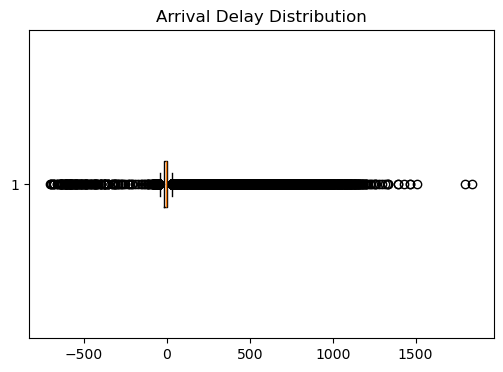

In [328]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["ARR_DELAY"], vert=False)
plt.title("Arrival Delay Distribution")
plt.show()

<Axes: xlabel='ARR_DELAY'>

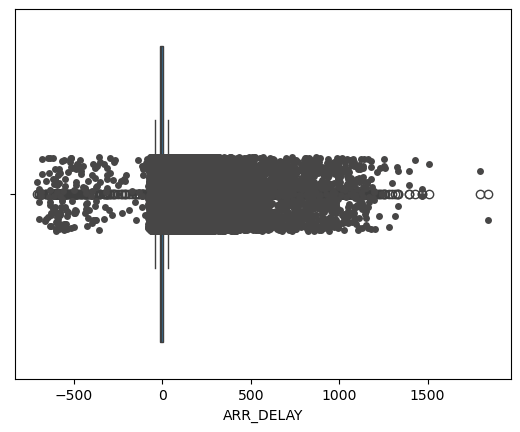

In [329]:
sns.boxplot(x='ARR_DELAY', data=df)
sns.stripplot(x='ARR_DELAY', data=df, color="#474646")

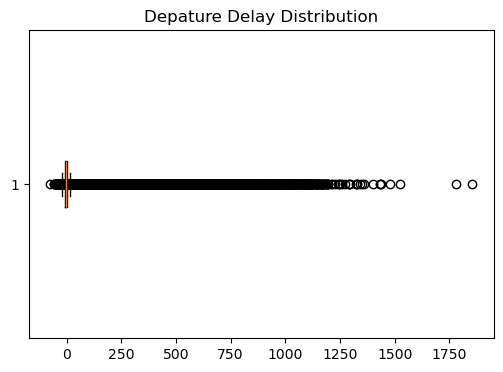

In [330]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["DEP_DELAY"], vert=False)
plt.title("Depature Delay Distribution")
plt.show()

<Axes: xlabel='DEP_DELAY'>

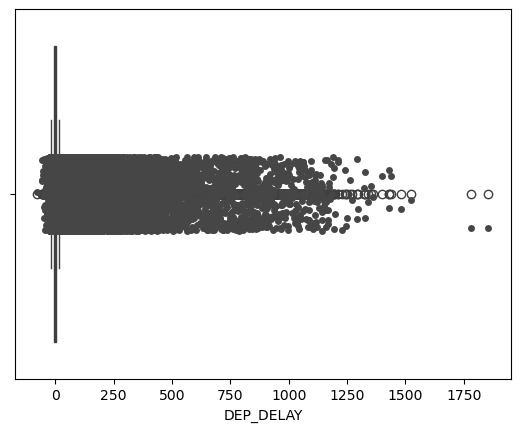

In [331]:
sns.boxplot(x='DEP_DELAY', data=df)
sns.stripplot(x='DEP_DELAY', data=df, color="#474646")

- So The Plots Show Highly Skewed Data
- Most Of The Data Are Near Zero
- We Will Just Drop 1% From Low and 1% From High

In [332]:
low_a, high_a = df["ARR_DELAY"].quantile([0.01, 0.99])
low_d, high_d = df["DEP_DELAY"].quantile([0.01, 0.99])

old = len (df)

df = df[
    df["ARR_DELAY"].between(low_a, high_a)
    & df["DEP_DELAY"].between(low_d, high_d)
]

print("Removed rows:", old - len(df))

Removed rows: 33157


b. FLIGHT_DURATION

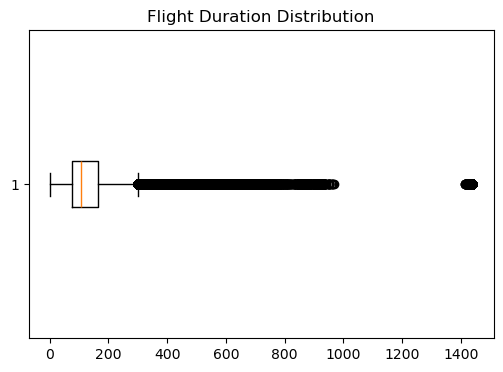

In [333]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["FLIGHT_DURATION"], vert=False)
plt.title("Flight Duration Distribution")
plt.show()

<Axes: xlabel='FLIGHT_DURATION'>

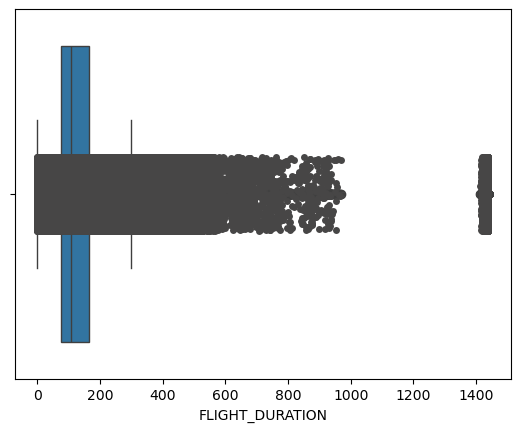

In [334]:
sns.boxplot(x='FLIGHT_DURATION', data=df)
sns.stripplot(x='FLIGHT_DURATION', data=df, color="#474646")

- Very short flights (<10 min) → impossible

- Very long domestic flights (>1000 min ≈ 16.5h) → error

In [335]:
before = len(df)

df = df[(df["FLIGHT_DURATION"] >= 10) & (df["FLIGHT_DURATION"] <= 1000)]

after = len(df[(df["FLIGHT_DURATION"] >= 10) & (df["FLIGHT_DURATION"] <= 1000)])
print("Removed rows:", before - after)

Removed rows: 10196


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1161472 entries, 0 to 1204824
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   FL_DATE               1161472 non-null  datetime64[ns]
 1   AIRLINE_ID            1161472 non-null  string        
 2   TAIL_NUM              1161472 non-null  object        
 3   FLIGHT_NUM            1161472 non-null  string        
 4   ORIGIN_AIRPORT        1161472 non-null  object        
 5   DEST_AIRPORT          1161472 non-null  object        
 6   ROUTE                 1161472 non-null  object        
 7   DEP_TIME              1161472 non-null  object        
 8   DEP_HOUR              1161472 non-null  int64         
 9   DEP_PERIOD            1161472 non-null  category      
 10  DEP_DELAY             1161472 non-null  Int64         
 11  FLIGHT_DURATION       1161472 non-null  int64         
 12  ARR_TIME              1161472 non-null  object 

Now We Are Ready To Start Our EDA (Analysis)

## EDA

In [337]:
df.describe().round(2)

,FL_DATE,DEP_HOUR,DEP_DELAY,FLIGHT_DURATION,ARR_HOUR,ARR_DELAY,IS_DELAYED,ROUTE_FREQ,AIRLINE_AVG_DELAY,ORIGIN_AVG_DEP_DELAY,IS_WEEKEND
count,1161472,1161472.00,1161472.0,1161472.00,1161472.00,1161472.0,1161472.00,1161472.00,1161472.0,1161472.0,1161472.00
mean,2019-03-26 21:24:37.278488320,12.88,4.18,135.14,14.29,-1.66,0.12,476.48,0.94,6.84,0.24
min,2018-08-01 00:00:00,0.00,-15.0,10.00,0.00,-39.0,0.00,1.00,-3.28,-12.35,0.00
25%,2018-08-14 00:00:00,9.00,-6.0,75.00,10.00,-16.0,0.00,191.00,-1.43,5.18,0.00
50%,2018-08-28 00:00:00,13.00,-3.0,108.00,14.00,-8.0,0.00,366.00,0.45,6.59,0.00
75%,2020-01-14 00:00:00,17.00,3.0,164.00,19.00,3.0,0.00,626.00,2.94,8.6,0.00
max,2020-01-31 00:00:00,23.00,171.0,968.00,23.00,181.0,1.00,2598.00,30.42,44.0,1.00
std,NaN,5.02,23.1,93.51,5.29,27.23,0.33,403.60,4.06,3.05,0.42


### 1. Which airlines have the worst average arrival delays?

In [338]:
x = (df.groupby("AIRLINE_ID", as_index=False)
        .agg(
            flights=("AIRLINE_ID", "size"),
            avg_arr_delay=("ARR_DELAY", "mean"),
            median_arr_delay=("ARR_DELAY", "median"),
            pct_delayed=("IS_DELAYED", lambda s: (s == 1).mean() * 100)
        )
        .sort_values(["avg_arr_delay", "pct_delayed"], ascending=[False, False]))

x.head(10)

,AIRLINE_ID,flights,avg_arr_delay,median_arr_delay,pct_delayed
8,20225,138,25.094203,16.0,52.173913
22,20445,4007,13.249813,-3.0,30.696282
9,20237,6829,11.854005,-2.0,28.232538
1,19687,9602,9.592585,0.0,24.901062
25,21167,8531,7.174423,-4.0,22.728871
24,20500,7553,6.615252,-7.0,22.520853
10,20263,655,6.244275,0.0,18.778626
20,20427,7675,5.538762,-7.0,22.723127
7,20046,7368,4.653366,-7.0,20.385451
6,19977,95590,0.360247,-7.0,14.678314


### 2. Which airlines are the most reliable?

In [339]:
x = (df.groupby("AIRLINE_ID", as_index=False)
        .agg(
            flights=("AIRLINE_ID", "size"),
            avg_arr_delay=("ARR_DELAY", "mean"),
            median_arr_delay=("ARR_DELAY", "median"),
            pct_delayed=("IS_DELAYED", lambda s: (s == 1).mean() * 100)
        )
        .sort_values(["avg_arr_delay", "pct_delayed"], ascending=[True, True]))

x.head(10)

,AIRLINE_ID,flights,avg_arr_delay,median_arr_delay,pct_delayed
12,20363,40166,-6.370562,-13.0,9.630035
3,19790,153201,-5.418294,-10.0,8.133759
23,20452,50705,-4.532512,-11.0,10.332314
2,19690,13661,-2.978479,-5.0,3.747895
11,20304,122173,-2.81802,-9.0,11.064638
0,19393,206265,-2.422534,-8.0,10.454997
17,20398,44074,-1.527477,-7.0,11.367246
19,20416,29912,-1.218006,-8.0,11.931666
4,19805,139527,-0.631763,-7.0,13.354405
13,20366,24649,-0.63102,-9.0,13.716581


### 3. Which day of the week has the highest delays?

In [340]:
x = (df.groupby("DAY_OF_WEEK", as_index=False)
        .agg(
            flights=("DAY_OF_WEEK", "size"),
            avg_arr_delay=("ARR_DELAY", "mean"),
            median_arr_delay=("ARR_DELAY", "median"),
            pct_delayed=("IS_DELAYED", lambda s: (s == 1).mean() * 100)
        )
        .sort_values(["avg_arr_delay", "pct_delayed"], ascending=[False, False]))

x

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\1211731499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = (df.groupby("DAY_OF_WEEK", as_index=False)


,DAY_OF_WEEK,flights,avg_arr_delay,median_arr_delay,pct_delayed
4,Friday,191804,-0.713817,-7.0,12.948635
1,Tuesday,149935,-0.839237,-8.0,13.352453
0,Monday,156629,-1.081192,-8.0,12.709013
3,Thursday,196808,-1.677015,-8.0,11.740885
5,Saturday,121294,-1.776081,-8.0,11.496859
2,Wednesday,192764,-2.304559,-8.0,11.922351
6,Sunday,152238,-3.316892,-9.0,10.416585


### 4. Do late departures strongly impact arrival delays?

In [341]:
x = df[["DEP_DELAY", "ARR_DELAY"]].corr(numeric_only=True)
x

,DEP_DELAY,ARR_DELAY
DEP_DELAY,1.000000,0.869226
ARR_DELAY,0.869226,1.000000


In [342]:
x = (df.groupby("DELAY_LEVEL", as_index=False)
              .agg(
                  flights=("DELAY_LEVEL", "size"),
                  avg_dep_delay=("DEP_DELAY", "mean"),
                  avg_arr_delay=("ARR_DELAY", "mean"),
                  median_arr_delay=("ARR_DELAY", "median"),
                  pct_delayed=("IS_DELAYED", lambda s: (s == 1).mean() * 100)
              )
              .sort_values("avg_arr_delay", ascending=False))

x

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\2891543448.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = (df.groupby("DELAY_LEVEL", as_index=False)


,DELAY_LEVEL,flights,avg_dep_delay,avg_arr_delay,median_arr_delay,pct_delayed
3,Severe,48989,89.124212,99.983159,93.0,100.0
2,Moderate,91665,27.532177,32.523166,30.0,100.0
1,Minor,193467,4.473667,6.542609,6.0,0.0
0,On-time,827351,-3.50199,-13.38229,-12.0,0.0


### 5. Are longer flights more likely to be delayed?

In [343]:
df_tmp = df.copy()

# 3 bins by quantiles (balanced sizes). You can change q=4 for quartiles.
df_tmp["DURATION_BIN"] = pd.qcut(df_tmp["FLIGHT_DURATION"], q=3, duplicates="drop")

x = (df_tmp.groupby("DURATION_BIN", as_index=False)
        .agg(
            flights=("DURATION_BIN", "size"),
            avg_duration=("FLIGHT_DURATION", "mean"),
            avg_arr_delay=("ARR_DELAY", "mean"),
            median_arr_delay=("ARR_DELAY", "median"),
            pct_delayed=("IS_DELAYED", lambda s: (s == 1).mean() * 100)
        )
        .sort_values("avg_duration"))

x

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\4082493540.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = (df_tmp.groupby("DURATION_BIN", as_index=False)


,DURATION_BIN,flights,avg_duration,avg_arr_delay,median_arr_delay,pct_delayed
0,"(9.999, 85.0]",395071,62.945876,-4.393256,-10.0,9.420585
1,"(85.0, 143.0]",380525,110.578296,-1.417092,-8.0,12.350831
2,"(143.0, 968.0]",385876,233.277138,0.902171,-6.0,14.625942


### 6. Which origin airports contribute the most to delays?

In [344]:
min_origin_flights = 500

x = (df.groupby("ORIGIN_AIRPORT", as_index=False)
         .agg(
             flights=("ORIGIN_AIRPORT", "size"),
             avg_dep_delay=("DEP_DELAY", "mean"),
             median_dep_delay=("DEP_DELAY", "median"),
             avg_arr_delay=("ARR_DELAY", "mean"),
             pct_delayed=("IS_DELAYED", lambda s: (s == 1).mean() * 100)
         )
         .query("flights >= @min_origin_flights")
         .sort_values(["avg_dep_delay", "avg_arr_delay"], ascending=[False, False]))

x.head(15)

,ORIGIN_AIRPORT,flights,avg_dep_delay,median_dep_delay,avg_arr_delay,pct_delayed
220,MDW,12588,9.918494,1.0,0.760963,15.800763
119,EWR,21411,8.390033,-3.0,2.0652,17.621783
36,BGR,691,8.108538,-4.0,1.127352,18.668596
320,SEA,26727,7.635687,-1.0,3.492274,18.232499
322,SFO,26982,7.514973,-2.0,1.46531,17.370840
303,ROA,796,7.312814,-3.0,2.182161,18.341709
256,ORD,53155,7.217364,-2.0,3.606058,18.442291
90,DAL,11272,6.631742,0.0,-1.303407,11.435415
59,BWI,15598,6.320297,-1.0,-2.646557,12.084883
270,PHL,20255,6.214712,-3.0,-0.478203,16.050358


### 7. How accurate is the delay labeling (IS_DELAYED)?

In [345]:
x = pd.crosstab(
    df["IS_DELAYED"],
    (df["ARR_DELAY"] > 0).astype(int),
    rownames=["IS_DELAYED"],
    colnames=["ARR_DELAY>"]
)

x

ARR_DELAY>,0,1
IS_DELAYED,,
0,827351,193467
1,0,140654


- This Confussion Happened Since We Didn't Count Minor Delays As True (1) In IS_DELAYED Column

### 8. At which departure periods are flights most likely to be delayed?

In [346]:
pivot_dep_period = pd.pivot_table(
    df,
    values='IS_DELAYED',
    index='DEP_PERIOD',
    aggfunc='mean'
)
pivot_dep_period

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\3414883963.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_dep_period = pd.pivot_table(


,IS_DELAYED
DEP_PERIOD,
Night,0.256285
Morning,0.062632
Afternoon,0.128382
Evening,0.176899


### 9. How do delays vary across the week and weekends?

In [347]:
pivot_day_week = pd.pivot_table(
    df,
    values='ARR_DELAY',
    index='DAY_OF_WEEK',
    columns='IS_WEEKEND',
    aggfunc='mean'
)
pivot_day_week

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\1021505650.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_day_week = pd.pivot_table(


IS_WEEKEND,0,1
DAY_OF_WEEK,,
Monday,-1.081192,<NA>
Tuesday,-0.839237,<NA>
Wednesday,-2.304559,<NA>
Thursday,-1.677015,<NA>
Friday,-0.713817,<NA>
Saturday,<NA>,-1.776081
Sunday,<NA>,-3.316892


### 10. Do high-frequency routes suffer more delays?

In [348]:
pivot_route = pd.pivot_table(
    df,
    values='ARR_DELAY',
    index='ROUTE',
    aggfunc=['mean', 'count']
).sort_values(('count', 'ARR_DELAY'), ascending=False)
pivot_route

,mean,count
,ARR_DELAY,ARR_DELAY
ROUTE,,
SFO → LAX,-1.393122,2559
LAX → SFO,1.589552,2546
LAX → LAS,-3.276303,2034
LAS → LAX,-3.688146,2033
ORD → LGA,5.812593,2017
...,...,...
MSY → SMF,-1.0,1
MSN → SEA,-8.0,1


## Data Visualization

### 1. What does the overall arrival delay distribution look like?

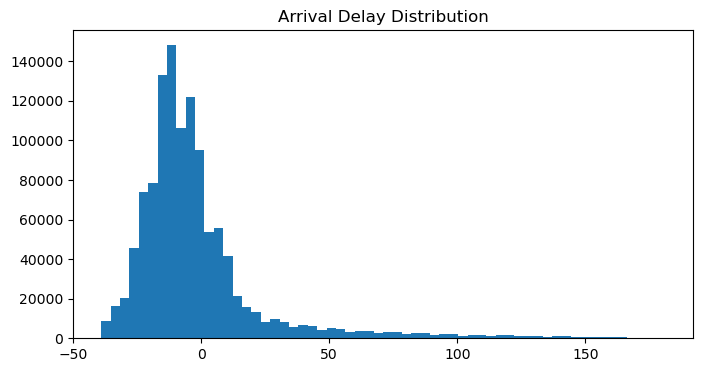

In [349]:
plt.figure(figsize=(8, 4))
plt.hist(df["ARR_DELAY"], bins=60)
plt.title("Arrival Delay Distribution")
plt.show()

Insight: Highly right-skewed, most flights near on-time, long tail of extreme delays.

In [350]:
"""fig = px.histogram(
    df,
    x="ARR_DELAY",
    nbins=60,
    title="Arrival Delay Distribution",
    template="plotly_dark"
)
fig.update_layout(
    xaxis_title="Arrival Delay (minutes)",
    yaxis_title="Count",
    bargap=0.05,
    title= {"x": 0.5}
)
fig.show()"""

'fig = px.histogram(\n    df,\n    x="ARR_DELAY",\n    nbins=60,\n    title="Arrival Delay Distribution",\n    template="plotly_dark"\n)\nfig.update_layout(\n    xaxis_title="Arrival Delay (minutes)",\n    yaxis_title="Count",\n    bargap=0.05,\n    title= {"x": 0.5}\n)\nfig.show()'

### 2. How frequent are delayed vs on-time flights?

<Axes: xlabel='IS_DELAYED'>

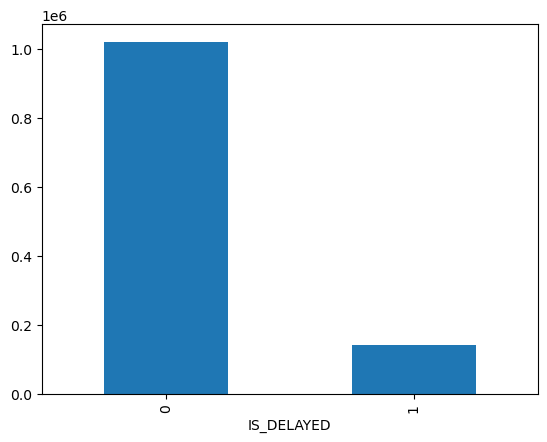

In [351]:
df["IS_DELAYED"].value_counts().plot(kind="bar")

Insight: Majority on-time, but a meaningful portion delayed (>15 min).

In [352]:
"""delay_counts = df["IS_DELAYED"].value_counts().reset_index()
delay_counts.columns = ["IS_DELAYED", "Count"]
delay_counts["IS_DELAYED"] = delay_counts["IS_DELAYED"].map(
    {0: "On Time", 1: "Delayed", False: "On Time", True: "Delayed"}
)

fig = px.bar(
    delay_counts,
    x="IS_DELAYED",
    y="Count",
    title="Delayed vs On-Time Flights",
    template="plotly_dark",
    text="Count"
)

fig.update_layout(
    xaxis_title="Flight Status",
    yaxis_title="Number of Flights",
    bargap=0.3,
    title= {"x": 0.5}
)

fig.show()"""

'delay_counts = df["IS_DELAYED"].value_counts().reset_index()\ndelay_counts.columns = ["IS_DELAYED", "Count"]\ndelay_counts["IS_DELAYED"] = delay_counts["IS_DELAYED"].map(\n    {0: "On Time", 1: "Delayed", False: "On Time", True: "Delayed"}\n)\n\nfig = px.bar(\n    delay_counts,\n    x="IS_DELAYED",\n    y="Count",\n    title="Delayed vs On-Time Flights",\n    template="plotly_dark",\n    text="Count"\n)\n\nfig.update_layout(\n    xaxis_title="Flight Status",\n    yaxis_title="Number of Flights",\n    bargap=0.3,\n    title= {"x": 0.5}\n)\n\nfig.show()'

### 3. How severe are delays when they happen?

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\784610402.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


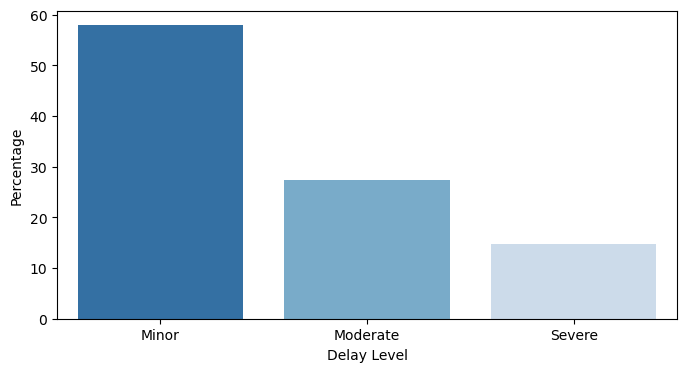

In [353]:
# Keep only delayed flights
delayed_df = df[df["DELAY_LEVEL"] != "On-time"]

# Compute percentages
delay_pct = (
    delayed_df["DELAY_LEVEL"]
    .value_counts(normalize=True)
    .mul(100)
    .reset_index()
)

delay_pct.columns = ["Delay Level", "Percentage"]

# Order levels
order = ["Minor", "Moderate", "Severe"]

plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=delay_pct,
    x="Delay Level",
    y="Percentage",
    order=order,
    palette="Blues_r"
)

Insight: Minor delays dominate; severe delays are rare but impactful.

In [354]:
"""# Keep only delayed flights (exclude On-time)
df_delayed = df[df["DELAY_LEVEL"] != "On-time"].copy()

# Order severity levels
order = ["Minor", "Moderate", "Severe"]

fig = px.histogram(
    df_delayed,
    x="DELAY_LEVEL",
    category_orders={"DELAY_LEVEL": order},
    histnorm="percent",                 
    text_auto=".1f",                    # show % on bars
    title="Delay Severity Distribution",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Delay Level",
    yaxis_title="Percentage of Delayed Flights",
    bargap=0.25
)

fig.update_traces(textposition="outside", cliponaxis=False)

fig.show()"""

'# Keep only delayed flights (exclude On-time)\ndf_delayed = df[df["DELAY_LEVEL"] != "On-time"].copy()\n\n# Order severity levels\norder = ["Minor", "Moderate", "Severe"]\n\nfig = px.histogram(\n    df_delayed,\n    x="DELAY_LEVEL",\n    category_orders={"DELAY_LEVEL": order},\n    histnorm="percent",                 \n    text_auto=".1f",                    # show % on bars\n    title="Delay Severity Distribution",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Delay Level",\n    yaxis_title="Percentage of Delayed Flights",\n    bargap=0.25\n)\n\nfig.update_traces(textposition="outside", cliponaxis=False)\n\nfig.show()'

### 4. How severe are arrival delays compared to departure delays?

<Axes: >

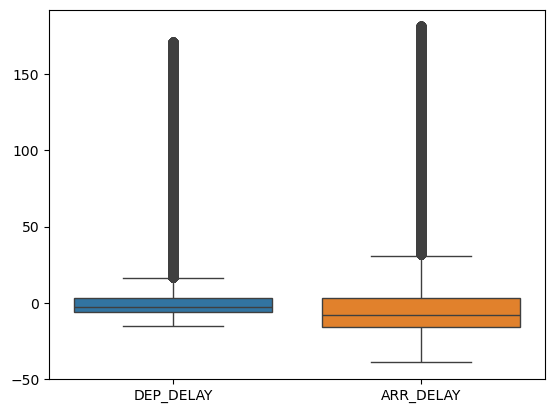

In [355]:
sns.boxplot(data=df[['DEP_DELAY', 'ARR_DELAY']])

Insights: Extreme delays exist for both — but ARR_DELAY is more severe

In [356]:
"""# Reshape data to long format (required by Plotly Express)
df_long = df.melt(
    value_vars=["DEP_DELAY", "ARR_DELAY"],
    var_name="Delay Type",
    value_name="Delay (minutes)"
)

fig = px.box(
    df_long,
    x="Delay Type",
    y="Delay (minutes)",
    title="Arrival vs Departure Delay Severity",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="",
    yaxis_title="Delay (minutes)",
    boxmode="group"
)

fig.show()"""

'# Reshape data to long format (required by Plotly Express)\ndf_long = df.melt(\n    value_vars=["DEP_DELAY", "ARR_DELAY"],\n    var_name="Delay Type",\n    value_name="Delay (minutes)"\n)\n\nfig = px.box(\n    df_long,\n    x="Delay Type",\n    y="Delay (minutes)",\n    title="Arrival vs Departure Delay Severity",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="",\n    yaxis_title="Delay (minutes)",\n    boxmode="group"\n)\n\nfig.show()'

### 5. Which airlines have the highest average arrival delay?

<Axes: xlabel='AIRLINE_ID'>

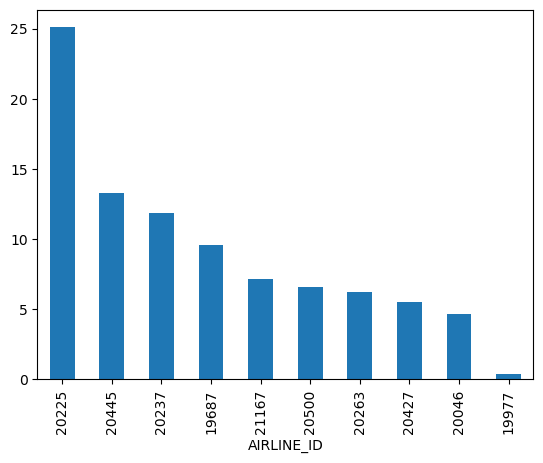

In [357]:
top_airlines = df.groupby('AIRLINE_ID')['ARR_DELAY'].mean().sort_values(ascending=False).head(10)
top_airlines.plot(kind='bar')

Insight: Airline with AIRLINE_ID = 20225 has the highest average value with a noticable difference from the second one

In [358]:
"""# Compute top 10 airlines by average arrival delay
top_airlines = (
    df.groupby("AIRLINE_ID", as_index=False)["ARR_DELAY"]
      .mean()
      .sort_values("ARR_DELAY", ascending=False)
      .head(10)
)
top_airlines["AIRLINE_ID"] = top_airlines["AIRLINE_ID"].astype(str)

fig = px.bar(
    top_airlines,
    x="AIRLINE_ID",
    y="ARR_DELAY",
    text=top_airlines["ARR_DELAY"].round(1),
    title="Top 10 Airlines by Average Arrival Delay",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Airline",
    yaxis_title="Average Arrival Delay (minutes)",
    bargap=0.25
)

fig.update_traces(textposition="outside", cliponaxis=False)

fig.show()"""

'# Compute top 10 airlines by average arrival delay\ntop_airlines = (\n    df.groupby("AIRLINE_ID", as_index=False)["ARR_DELAY"]\n      .mean()\n      .sort_values("ARR_DELAY", ascending=False)\n      .head(10)\n)\ntop_airlines["AIRLINE_ID"] = top_airlines["AIRLINE_ID"].astype(str)\n\nfig = px.bar(\n    top_airlines,\n    x="AIRLINE_ID",\n    y="ARR_DELAY",\n    text=top_airlines["ARR_DELAY"].round(1),\n    title="Top 10 Airlines by Average Arrival Delay",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Airline",\n    yaxis_title="Average Arrival Delay (minutes)",\n    bargap=0.25\n)\n\nfig.update_traces(textposition="outside", cliponaxis=False)\n\nfig.show()'

### 6. Does departure delay predict arrival delay?

<Axes: xlabel='DEP_DELAY', ylabel='ARR_DELAY'>

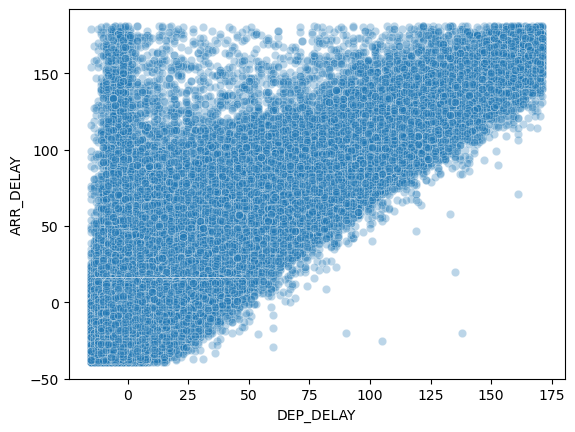

In [359]:
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=df, alpha=0.3)

Insights: 
- strong positive relationship between departure and arrival delays. 
- While small departure delays can often be partially recovered. 
- large delays propagate almost fully to arrival time.

In [360]:
"""fig = px.scatter(
    df,
    x="DEP_DELAY",
    y="ARR_DELAY",
    opacity=0.3,                     
    title="Relationship Between Departure and Arrival Delays",
    template="plotly_dark"                  
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   
    xaxis_title="Departure Delay (minutes)",
    yaxis_title="Arrival Delay (minutes)"
)

fig.show()"""

'fig = px.scatter(\n    df,\n    x="DEP_DELAY",\n    y="ARR_DELAY",\n    opacity=0.3,                     \n    title="Relationship Between Departure and Arrival Delays",\n    template="plotly_dark"                  \n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   \n    xaxis_title="Departure Delay (minutes)",\n    yaxis_title="Arrival Delay (minutes)"\n)\n\nfig.show()'

### 7. How does flight duration affect arrival delay?

<Axes: xlabel='FLIGHT_DURATION', ylabel='ARR_DELAY'>

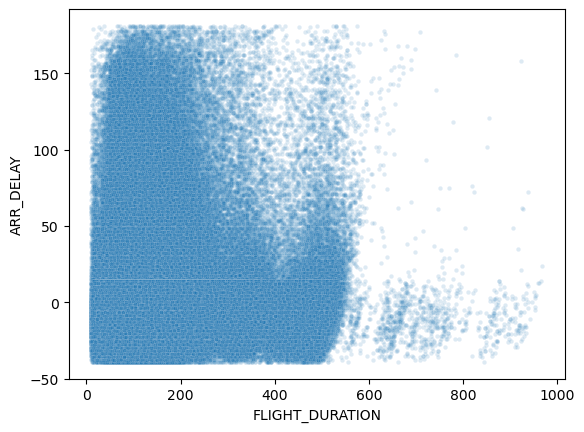

In [361]:
sns.scatterplot(
    data=df,
    x="FLIGHT_DURATION",
    y="ARR_DELAY",
    alpha=0.15,
    s=10
)

Insight: Flight duration alone is not a strong delay predictor

In [362]:
"""fig = px.scatter(
    df,
    x="FLIGHT_DURATION",
    y="ARR_DELAY",
    opacity=0.3,
    title="Effect of Flight Duration on Arrival Delay",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Flight Duration (minutes)",
    yaxis_title="Arrival Delay (minutes)"
)

fig.show()"""

'fig = px.scatter(\n    df,\n    x="FLIGHT_DURATION",\n    y="ARR_DELAY",\n    opacity=0.3,\n    title="Effect of Flight Duration on Arrival Delay",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Flight Duration (minutes)",\n    yaxis_title="Arrival Delay (minutes)"\n)\n\nfig.show()'

### 8. How do delays change throughout the day?

<Axes: xlabel='DEP_HOUR'>

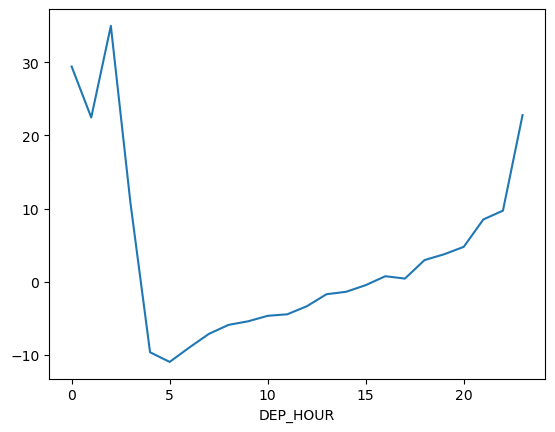

In [363]:
df.groupby('DEP_HOUR')['ARR_DELAY'].mean().plot()

Insight: 
- Flights departing early in the morning exhibit the best on-time performance.
- while delays increase progressively throughout the day. 
- peaking during late evening hours.

In [364]:
"""
# Prepare aggregated data
hourly_delay = (
    df.groupby("DEP_HOUR", as_index=False)["ARR_DELAY"]
      .mean()
)

fig = px.line(
    hourly_delay,
    x="DEP_HOUR",
    y="ARR_DELAY",
    markers=True,
    title="Average Arrival Delay Throughout the Day",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Departure Hour",
    yaxis_title="Average Arrival Delay (minutes)"
)

# make hours explicit and cleaner
fig.update_xaxes(
    tickmode="linear",
    dtick=1
)

fig.show()
"""

'\n# Prepare aggregated data\nhourly_delay = (\n    df.groupby("DEP_HOUR", as_index=False)["ARR_DELAY"]\n      .mean()\n)\n\nfig = px.line(\n    hourly_delay,\n    x="DEP_HOUR",\n    y="ARR_DELAY",\n    markers=True,\n    title="Average Arrival Delay Throughout the Day",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Departure Hour",\n    yaxis_title="Average Arrival Delay (minutes)"\n)\n\n# make hours explicit and cleaner\nfig.update_xaxes(\n    tickmode="linear",\n    dtick=1\n)\n\nfig.show()\n'

### 9. Which time of day has the most delays?

<Axes: xlabel='DEP_PERIOD', ylabel='ARR_DELAY'>

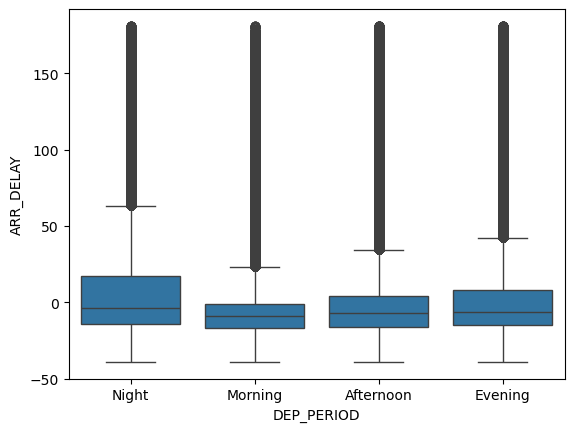

In [365]:
sns.boxplot(x='DEP_PERIOD', y='ARR_DELAY', data=df)

Insight: 
- Morning flights perform best overall
- Night flights have the worst arrival delays

In [366]:
"""
# Ensure logical order of time periods
order = ["Morning", "Afternoon", "Evening", "Night"]

fig = px.box(
    df,
    x="DEP_PERIOD",
    y="ARR_DELAY",
    category_orders={"DEP_PERIOD": order},
    title="Arrival Delay Distribution by Time of Day",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Time of Day",
    yaxis_title="Arrival Delay (minutes)"
)

fig.show()
"""

'\n# Ensure logical order of time periods\norder = ["Morning", "Afternoon", "Evening", "Night"]\n\nfig = px.box(\n    df,\n    x="DEP_PERIOD",\n    y="ARR_DELAY",\n    category_orders={"DEP_PERIOD": order},\n    title="Arrival Delay Distribution by Time of Day",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Time of Day",\n    yaxis_title="Arrival Delay (minutes)"\n)\n\nfig.show()\n'

### 10. Are weekends worse than weekdays?

<Axes: xlabel='IS_WEEKEND', ylabel='ARR_DELAY'>

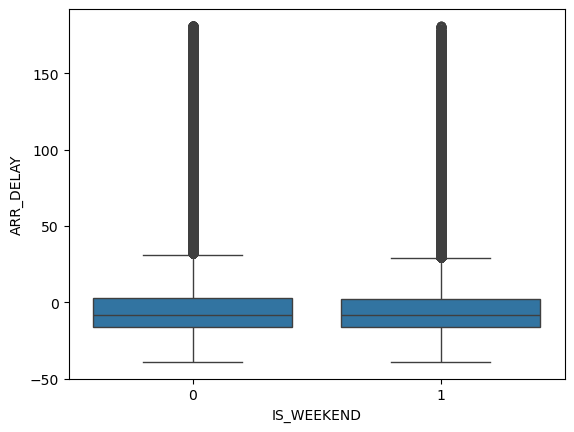

In [367]:
sns.boxplot(x='IS_WEEKEND', y='ARR_DELAY', data=df)

Insight: Weekday and weekend arrival delays are broadly similar

In [368]:
"""# Make labels readable
df_plot = df.copy()
df_plot["IS_WEEKEND"] = df_plot["IS_WEEKEND"].map(
    {0: "Weekday", 1: "Weekend", False: "Weekday", True: "Weekend"}
)

fig = px.box(
    df_plot,
    x="IS_WEEKEND",
    y="ARR_DELAY",
    title="Arrival Delay Distribution: Weekdays vs Weekends",
    template="plotly_dark",
    points="outliers"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Day Type",
    yaxis_title="Arrival Delay (minutes)"
)

fig.show()"""

'# Make labels readable\ndf_plot = df.copy()\ndf_plot["IS_WEEKEND"] = df_plot["IS_WEEKEND"].map(\n    {0: "Weekday", 1: "Weekend", False: "Weekday", True: "Weekend"}\n)\n\nfig = px.box(\n    df_plot,\n    x="IS_WEEKEND",\n    y="ARR_DELAY",\n    title="Arrival Delay Distribution: Weekdays vs Weekends",\n    template="plotly_dark",\n    points="outliers"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Day Type",\n    yaxis_title="Arrival Delay (minutes)"\n)\n\nfig.show()'

### 11. Which day of the week has the highest delays?

<Axes: xlabel='DAY_OF_WEEK', ylabel='ARR_DELAY'>

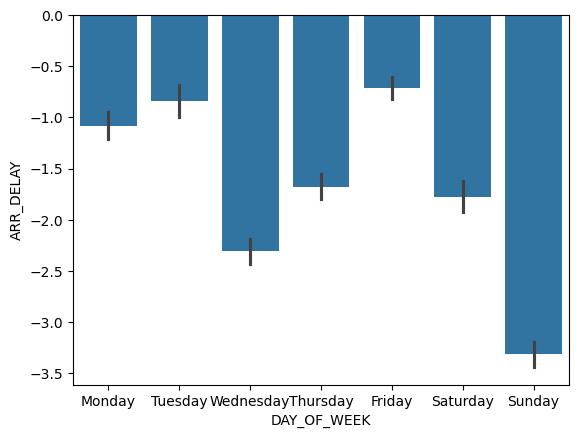

In [369]:
sns.barplot(x='DAY_OF_WEEK', y='ARR_DELAY', data=df)

Insight: 
- Mid-week flights perform worse than weekends
- Friday has the highest delays

In [370]:
"""
# Ensure correct day order
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig = px.bar(
    df,
    x="DAY_OF_WEEK",
    y="ARR_DELAY",
    category_orders={"DAY_OF_WEEK": order},
    title="Average Arrival Delay by Day of the Week",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Day of Week",
    yaxis_title="Average Arrival Delay (minutes)"
)

fig.show()"""

'\n# Ensure correct day order\norder = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]\n\nfig = px.bar(\n    df,\n    x="DAY_OF_WEEK",\n    y="ARR_DELAY",\n    category_orders={"DAY_OF_WEEK": order},\n    title="Average Arrival Delay by Day of the Week",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Day of Week",\n    yaxis_title="Average Arrival Delay (minutes)"\n)\n\nfig.show()'

### 12. Do busy routes experience more delays?

<Axes: xlabel='ROUTE_FREQ_BIN', ylabel='ARR_DELAY'>

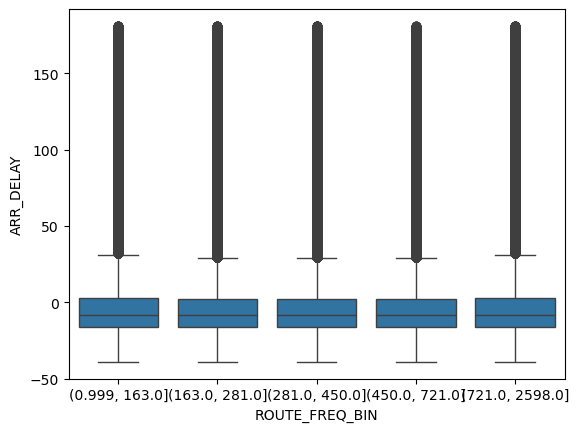

In [371]:
df['ROUTE_FREQ_BIN'] = pd.qcut(df['ROUTE_FREQ'], q=5)

sns.boxplot(
    x='ROUTE_FREQ_BIN',
    y='ARR_DELAY',
    data=df
)

In [372]:
df.drop('ROUTE_FREQ_BIN', axis = 1, inplace = True)

Insight: Route frequency has limited impact on typical arrival delays

In [373]:
"""
# Create frequency bins
df_plot = df.copy()
df_plot["ROUTE_FREQ_BIN"] = pd.qcut(df_plot["ROUTE_FREQ"], q=5)

fig = px.box(
    df_plot,
    x="ROUTE_FREQ_BIN",
    y="ARR_DELAY",
    title="Arrival Delay Distribution by Route Busyness",
    template="plotly_dark",
    points="outliers"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Route Frequency (Quantile Bins)",
    yaxis_title="Arrival Delay (minutes)"
)

fig.show()"""

'\n# Create frequency bins\ndf_plot = df.copy()\ndf_plot["ROUTE_FREQ_BIN"] = pd.qcut(df_plot["ROUTE_FREQ"], q=5)\n\nfig = px.box(\n    df_plot,\n    x="ROUTE_FREQ_BIN",\n    y="ARR_DELAY",\n    title="Arrival Delay Distribution by Route Busyness",\n    template="plotly_dark",\n    points="outliers"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Route Frequency (Quantile Bins)",\n    yaxis_title="Arrival Delay (minutes)"\n)\n\nfig.show()'

### 13. How does airline performance vary across delay levels?

<Axes: xlabel='AIRLINE_ID'>

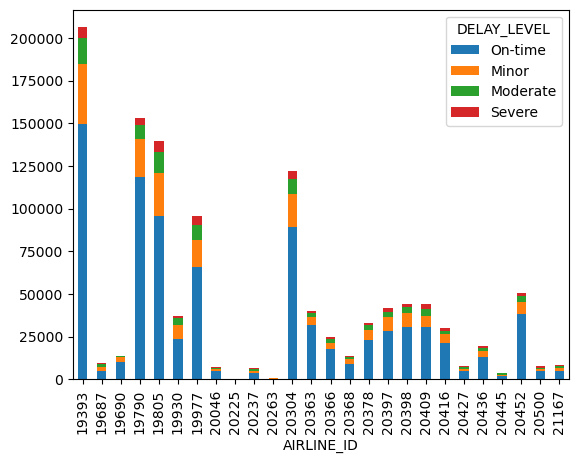

In [374]:
pd.crosstab(df['AIRLINE_ID'], df['DELAY_LEVEL']).plot(kind='bar', stacked=True)

Insight: 
- Airlines differ significantly in delay profiles, not just volume
- High-volume airlines are not necessarily the worst performers
- Smaller airlines can have disproportionately severe delays
- Severe delays exist for every airline

In [375]:
"""
airline_delay = (
    pd.crosstab(df["AIRLINE_ID"], df["DELAY_LEVEL"], normalize="index")
      .reset_index()
)

# Make AIRLINE_ID categorical (avoid numeric axis issues)
airline_delay["AIRLINE_ID"] = airline_delay["AIRLINE_ID"].astype(str)

fig = px.bar(
    airline_delay,
    x="AIRLINE_ID",
    y=["On-time", "Minor", "Moderate", "Severe"],
    title="Airline Performance Across Delay Levels",
    template="plotly_dark"
)

fig.update_layout(
    barmode="stack",
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Airline",
    yaxis_title="Proportion of Flights",
    yaxis_tickformat=".0%",
    legend_title_text="Delay Level"
)

fig.show()"""

'\nairline_delay = (\n    pd.crosstab(df["AIRLINE_ID"], df["DELAY_LEVEL"], normalize="index")\n      .reset_index()\n)\n\n# Make AIRLINE_ID categorical (avoid numeric axis issues)\nairline_delay["AIRLINE_ID"] = airline_delay["AIRLINE_ID"].astype(str)\n\nfig = px.bar(\n    airline_delay,\n    x="AIRLINE_ID",\n    y=["On-time", "Minor", "Moderate", "Severe"],\n    title="Airline Performance Across Delay Levels",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    barmode="stack",\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Airline",\n    yaxis_title="Proportion of Flights",\n    yaxis_tickformat=".0%",\n    legend_title_text="Delay Level"\n)\n\nfig.show()'

### 14. Which origin airports have the worst departure delays?

<Axes: xlabel='ORIGIN_AIRPORT'>

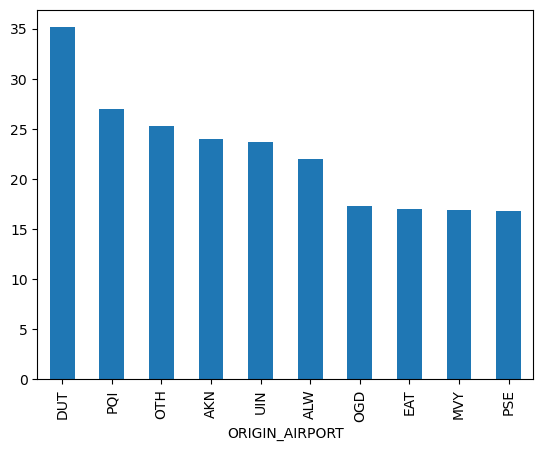

In [376]:
df.groupby('ORIGIN_AIRPORT')['DEP_DELAY'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

Insight: DUT origin airport has the worst depature delay

In [377]:
"""
# Aggregate and select top 10 worst airports
top_origins = (
    df.groupby("ORIGIN_AIRPORT", as_index=False)["DEP_DELAY"]
      .mean()
      .sort_values("DEP_DELAY", ascending=False)
      .head(10)
)

fig = px.bar(
    top_origins,
    x="ORIGIN_AIRPORT",
    y="DEP_DELAY",
    text=top_origins["DEP_DELAY"].round(1),
    title="Top 10 Origin Airports with Worst Average Departure Delays",
    template="plotly_dark"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Origin Airport",
    yaxis_title="Average Departure Delay (minutes)",
    bargap=0.25
)

fig.update_traces(textposition="outside", cliponaxis=False)

fig.show()"""

'\n# Aggregate and select top 10 worst airports\ntop_origins = (\n    df.groupby("ORIGIN_AIRPORT", as_index=False)["DEP_DELAY"]\n      .mean()\n      .sort_values("DEP_DELAY", ascending=False)\n      .head(10)\n)\n\nfig = px.bar(\n    top_origins,\n    x="ORIGIN_AIRPORT",\n    y="DEP_DELAY",\n    text=top_origins["DEP_DELAY"].round(1),\n    title="Top 10 Origin Airports with Worst Average Departure Delays",\n    template="plotly_dark"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="Origin Airport",\n    yaxis_title="Average Departure Delay (minutes)",\n    bargap=0.25\n)\n\nfig.update_traces(textposition="outside", cliponaxis=False)\n\nfig.show()'

### 15. What factors most strongly influence arrival delay?

<Axes: >

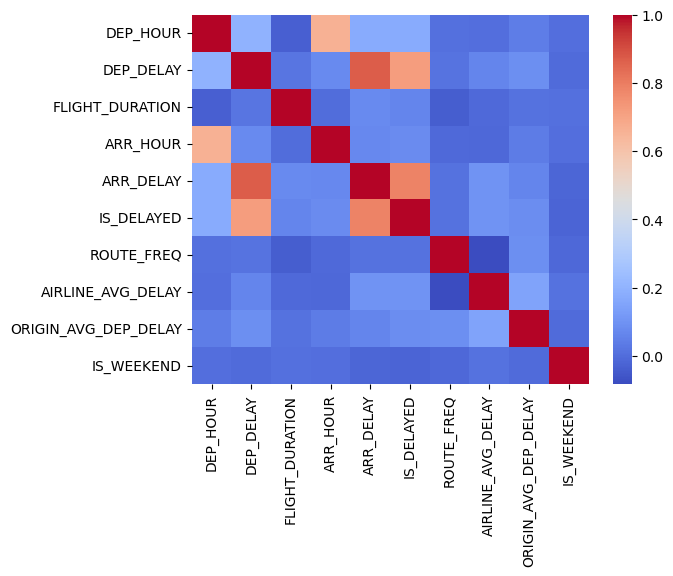

In [378]:
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')

Insight: departure delay is the strongest linear predictor of arrival delay

In [379]:
"""
# Correlation matrix for numeric columns
corr = df.select_dtypes(include="number").corr()

# Sort columns/rows by correlation with ARR_DELAY (so strongest are near the top)
if "ARR_DELAY" in corr.columns:
    order = corr["ARR_DELAY"].sort_values(ascending=False).index
    corr = corr.loc[order, order]

fig = px.imshow(
    corr,
    text_auto=".2f",
    title="Correlation Heatmap of Numeric Features",
    template="plotly_dark",
    aspect="auto"
)

fig.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="",
    yaxis_title=""
)

fig.show()"""

'\n# Correlation matrix for numeric columns\ncorr = df.select_dtypes(include="number").corr()\n\n# Sort columns/rows by correlation with ARR_DELAY (so strongest are near the top)\nif "ARR_DELAY" in corr.columns:\n    order = corr["ARR_DELAY"].sort_values(ascending=False).index\n    corr = corr.loc[order, order]\n\nfig = px.imshow(\n    corr,\n    text_auto=".2f",\n    title="Correlation Heatmap of Numeric Features",\n    template="plotly_dark",\n    aspect="auto"\n)\n\nfig.update_layout(\n    title={"x": 0.5, "xanchor": "center"},   # center title\n    xaxis_title="",\n    yaxis_title=""\n)\n\nfig.show()'

## Streamlit

- download the cleaned dataset to using it in streamlit

In [380]:
df.to_parquet("cleaned_data.parquet", index=False)

- that is the full 15 plotly figures code

In [381]:
"""
%%writefile app.py
import streamlit as st
import plotly.express as px
import pandas as pd

# read the cleaned data
df = pd.read_parquet("cleaned_data.parquet")


##########################################################################################################
# plotly figures: 
# 1. What does the overall arrival delay distribution look like?
fig1 = px.histogram(
    df,
    x="ARR_DELAY",
    nbins=60,
    title="Arrival Delay Distribution",
    template="plotly_dark"
)
fig1.update_layout(
    xaxis_title="Arrival Delay (minutes)",
    yaxis_title="Count",
    bargap=0.05,
    title= {"x": 0.5}
)

# 2. How frequent are delayed vs on-time flights?
delay_counts = df["IS_DELAYED"].value_counts().reset_index()
delay_counts.columns = ["IS_DELAYED", "Count"]
delay_counts["IS_DELAYED"] = delay_counts["IS_DELAYED"].map(
    {0: "On Time", 1: "Delayed", False: "On Time", True: "Delayed"}
)
fig2 = px.bar(
    delay_counts,
    x="IS_DELAYED",
    y="Count",
    title="Delayed vs On-Time Flights",
    template="plotly_dark",
    text="Count"
)
fig2.update_layout(
    xaxis_title="Flight Status",
    yaxis_title="Number of Flights",
    bargap=0.3,
    title= {"x": 0.5}
)

# 3. How severe are delays when they happen?
# Keep only delayed flights (exclude On-time)
df_delayed = df[df["DELAY_LEVEL"] != "On-time"].copy()
# Order severity levels
order = ["Minor", "Moderate", "Severe"]
fig3 = px.histogram(
    df_delayed,
    x="DELAY_LEVEL",
    category_orders={"DELAY_LEVEL": order},
    histnorm="percent",                 
    text_auto=".1f",                    # show % on bars
    title="Delay Severity Distribution",
    template="plotly_dark"
)
fig3.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Delay Level",
    yaxis_title="Percentage of Delayed Flights",
    bargap=0.25
)
fig3.update_traces(textposition="outside", cliponaxis=False)

# 4. How severe are arrival delays compared to departure delays?
# Reshape data to long format (required by Plotly Express)
df_long = df.melt(
    value_vars=["DEP_DELAY", "ARR_DELAY"],
    var_name="Delay Type",
    value_name="Delay (minutes)"
)
fig4 = px.box(
    df_long,
    x="Delay Type",
    y="Delay (minutes)",
    title="Arrival vs Departure Delay Severity",
    template="plotly_dark"
)
fig4.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="",
    yaxis_title="Delay (minutes)",
    boxmode="group"
)

# 5. Which airlines have the highest average arrival delay?
# Compute top 10 airlines by average arrival delay
top_airlines = (
    df.groupby("AIRLINE_ID", as_index=False)["ARR_DELAY"]
      .mean()
      .sort_values("ARR_DELAY", ascending=False)
      .head(10)
)
top_airlines["AIRLINE_ID"] = top_airlines["AIRLINE_ID"].astype(str)
fig5 = px.bar(
    top_airlines,
    x="AIRLINE_ID",
    y="ARR_DELAY",
    text=top_airlines["ARR_DELAY"].round(1),
    title="Top 10 Airlines by Average Arrival Delay",
    template="plotly_dark"
)
fig5.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Airline",
    yaxis_title="Average Arrival Delay (minutes)",
    bargap=0.25
)
fig5.update_traces(textposition="outside", cliponaxis=False)

# 6. Does departure delay predict arrival delay?
fig6 = px.scatter(
    df,
    x="DEP_DELAY",
    y="ARR_DELAY",
    opacity=0.3,                     
    title="Relationship Between Departure and Arrival Delays",
    template="plotly_dark"                  
)
fig6.update_layout(
    title={"x": 0.5, "xanchor": "center"},   
    xaxis_title="Departure Delay (minutes)",
    yaxis_title="Arrival Delay (minutes)"
)

# 7. How does flight duration affect arrival delay?
fig7 = px.scatter(
    df,
    x="FLIGHT_DURATION",
    y="ARR_DELAY",
    opacity=0.3,
    title="Effect of Flight Duration on Arrival Delay",
    template="plotly_dark"
)
fig7.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Flight Duration (minutes)",
    yaxis_title="Arrival Delay (minutes)"
)

### 8. How do delays change throughout the day?
# Prepare aggregated data
hourly_delay = (
    df.groupby("DEP_HOUR", as_index=False)["ARR_DELAY"]
      .mean()
)
fig8 = px.line(
    hourly_delay,
    x="DEP_HOUR",
    y="ARR_DELAY",
    markers=True,
    title="Average Arrival Delay Throughout the Day",
    template="plotly_dark"
)
fig8.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Departure Hour",
    yaxis_title="Average Arrival Delay (minutes)"
)
# make hours explicit and cleaner
fig8.update_xaxes(
    tickmode="linear",
    dtick=1
)

# 9. Which time of day has the most delays?
# Ensure logical order of time periods
order = ["Morning", "Afternoon", "Evening", "Night"]
fig9 = px.box(
    df,
    x="DEP_PERIOD",
    y="ARR_DELAY",
    category_orders={"DEP_PERIOD": order},
    title="Arrival Delay Distribution by Time of Day",
    template="plotly_dark"
)
fig9.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Time of Day",
    yaxis_title="Arrival Delay (minutes)"
)

# 10. Are weekends worse than weekdays?
# Make labels readable
df_plot = df.copy()
df_plot["IS_WEEKEND"] = df_plot["IS_WEEKEND"].map(
    {0: "Weekday", 1: "Weekend", False: "Weekday", True: "Weekend"}
)
fig10 = px.box(
    df_plot,
    x="IS_WEEKEND",
    y="ARR_DELAY",
    title="Arrival Delay Distribution: Weekdays vs Weekends",
    template="plotly_dark",
    points="outliers"
)
fig10.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Day Type",
    yaxis_title="Arrival Delay (minutes)"
)

# 11. Which day of the week has the highest delays?
# Ensure correct day order
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig11 = px.bar(
    df,
    x="DAY_OF_WEEK",
    y="ARR_DELAY",
    category_orders={"DAY_OF_WEEK": order},
    title="Average Arrival Delay by Day of the Week",
    template="plotly_dark"
)
fig11.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Day of Week",
    yaxis_title="Average Arrival Delay (minutes)"
)

# 12. Do busy routes experience more delays?
# Create frequency bins
df_plot = df.copy()
df_plot["ROUTE_FREQ_BIN"] = pd.qcut(df_plot["ROUTE_FREQ"], q=5)
fig12 = px.box(
    df_plot,
    x="ROUTE_FREQ_BIN",
    y="ARR_DELAY",
    title="Arrival Delay Distribution by Route Busyness",
    template="plotly_dark",
    points="outliers"
)
fig12.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Route Frequency (Quantile Bins)",
    yaxis_title="Arrival Delay (minutes)"
)

# 13. How does airline performance vary across delay levels?
airline_delay = (
    pd.crosstab(df["AIRLINE_ID"], df["DELAY_LEVEL"], normalize="index")
      .reset_index()
)

# Make AIRLINE_ID categorical (avoid numeric axis issues)
airline_delay["AIRLINE_ID"] = airline_delay["AIRLINE_ID"].astype(str)
fig13 = px.bar(
    airline_delay,
    x="AIRLINE_ID",
    y=["On-time", "Minor", "Moderate", "Severe"],
    title="Airline Performance Across Delay Levels",
    template="plotly_dark"
)
fig13.update_layout(
    barmode="stack",
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Airline",
    yaxis_title="Proportion of Flights",
    yaxis_tickformat=".0%",
    legend_title_text="Delay Level"
)

# 14. Which origin airports have the worst departure delays?
# Aggregate and select top 10 worst airports
top_origins = (
    df.groupby("ORIGIN_AIRPORT", as_index=False)["DEP_DELAY"]
      .mean()
      .sort_values("DEP_DELAY", ascending=False)
      .head(10)
)
fig14 = px.bar(
    top_origins,
    x="ORIGIN_AIRPORT",
    y="DEP_DELAY",
    text=top_origins["DEP_DELAY"].round(1),
    title="Top 10 Origin Airports with Worst Average Departure Delays",
    template="plotly_dark"
)
fig14.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Origin Airport",
    yaxis_title="Average Departure Delay (minutes)",
    bargap=0.25
)
fig14.update_traces(textposition="outside", cliponaxis=False)

# 15. What factors most strongly influence arrival delay?
# Correlation matrix for numeric columns
corr = df.select_dtypes(include="number").corr()
# Sort columns/rows by correlation with ARR_DELAY (so strongest are near the top)
if "ARR_DELAY" in corr.columns:
    order = corr["ARR_DELAY"].sort_values(ascending=False).index
    corr = corr.loc[order, order]
fig15 = px.imshow(
    corr,
    text_auto=".2f",
    title="Correlation Heatmap of Numeric Features",
    template="plotly_dark",
    aspect="auto"
)
fig15.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="",
    yaxis_title=""
)

##########################################################################################################

tab1, tab2, tab3, tab4, tab5, tab6, tab7, tab8, tab9, tab10, tab11,tab12, tab13, tab14, tab15 = st.tabs(
    ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"])

with tab1:
    st.header("1. What does the overall arrival delay distribution look like?")
    st.plotly_chart(fig1)

with tab2:
    st.header("2. How frequent are delayed vs on-time flights?")
    st.plotly_chart(fig2)

with tab3:
    st.header("3. How severe are delays when they happen?")
    st.plotly_chart(fig3)

with tab4:
    st.header("4. How severe are arrival delays compared to departure delays?")
    st.plotly_chart(fig4)

with tab5:
    st.header("5. Which airlines have the highest average arrival delay?")
    st.plotly_chart(fig5)

with tab6:
    st.header("6. Does departure delay predict arrival delay?")
    st.plotly_chart(fig6)

with tab7:
    st.header("7. How does flight duration affect arrival delay?")
    st.plotly_chart(fig7)

with tab8:
    st.header("8. How do delays change throughout the day?")
    st.plotly_chart(fig8)

with tab9:
    st.header("9. Which time of day has the most delays?")
    st.plotly_chart(fig9)

with tab10:
    st.header("10. Are weekends worse than weekdays?")
    st.plotly_chart(fig10)

with tab11:
    st.header("11. Which day of the week has the highest delays?")
    st.plotly_chart(fig11)

with tab12:
    st.header("12. Do busy routes experience more delays?")
    st.plotly_chart(fig12)

with tab13:
    st.header("13. How does airline performance vary across delay levels?")
    st.plotly_chart(fig13)

with tab14:
    st.header("14. Which origin airports have the worst departure delays?")
    st.plotly_chart(fig14)

with tab15:
    st.header("15. What factors most strongly influence arrival delay?")
    st.plotly_chart(fig15)

"""

'\n%%writefile app.py\nimport streamlit as st\nimport plotly.express as px\nimport pandas as pd\n\n# read the cleaned data\ndf = pd.read_parquet("cleaned_data.parquet")\n\n\n##########################################################################################################\n# plotly figures: \n# 1. What does the overall arrival delay distribution look like?\nfig1 = px.histogram(\n    df,\n    x="ARR_DELAY",\n    nbins=60,\n    title="Arrival Delay Distribution",\n    template="plotly_dark"\n)\nfig1.update_layout(\n    xaxis_title="Arrival Delay (minutes)",\n    yaxis_title="Count",\n    bargap=0.05,\n    title= {"x": 0.5}\n)\n\n# 2. How frequent are delayed vs on-time flights?\ndelay_counts = df["IS_DELAYED"].value_counts().reset_index()\ndelay_counts.columns = ["IS_DELAYED", "Count"]\ndelay_counts["IS_DELAYED"] = delay_counts["IS_DELAYED"].map(\n    {0: "On Time", 1: "Delayed", False: "On Time", True: "Delayed"}\n)\nfig2 = px.bar(\n    delay_counts,\n    x="IS_DELAYED",\n    y=

- sample of 5 plotly figures

In [382]:
%%writefile app.py
import streamlit as st
import plotly.express as px
import pandas as pd

# read the cleaned data
df = pd.read_parquet("cleaned_data.parquet")


##########################################################################################################
# plotly figures: 
# 1. What does the overall arrival delay distribution look like?
fig1 = px.histogram(
    df,
    x="ARR_DELAY",
    nbins=60,
    title="Arrival Delay Distribution",
    template="plotly_dark"
)
fig1.update_layout(
    xaxis_title="Arrival Delay (minutes)",
    yaxis_title="Count",
    bargap=0.05,
    title= {"x": 0.5}
)

# 2. How frequent are delayed vs on-time flights?
delay_counts = df["IS_DELAYED"].value_counts().reset_index()
delay_counts.columns = ["IS_DELAYED", "Count"]
delay_counts["IS_DELAYED"] = delay_counts["IS_DELAYED"].map(
    {0: "On Time", 1: "Delayed", False: "On Time", True: "Delayed"}
)
fig2 = px.bar(
    delay_counts,
    x="IS_DELAYED",
    y="Count",
    title="Delayed vs On-Time Flights",
    template="plotly_dark",
    text="Count"
)
fig2.update_layout(
    xaxis_title="Flight Status",
    yaxis_title="Number of Flights",
    bargap=0.3,
    title= {"x": 0.5}
)

# 3. How severe are delays when they happen?
# Keep only delayed flights (exclude On-time)
df_delayed = df[df["DELAY_LEVEL"] != "On-time"].copy()
# Order severity levels
order = ["Minor", "Moderate", "Severe"]
fig3 = px.histogram(
    df_delayed,
    x="DELAY_LEVEL",
    category_orders={"DELAY_LEVEL": order},
    histnorm="percent",                 
    text_auto=".1f",                    # show % on bars
    title="Delay Severity Distribution",
    template="plotly_dark"
)
fig3.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Delay Level",
    yaxis_title="Percentage of Delayed Flights",
    bargap=0.25
)
fig3.update_traces(textposition="outside", cliponaxis=False)

# 4. How severe are arrival delays compared to departure delays?
# Reshape data to long format (required by Plotly Express)
df_long = df.melt(
    value_vars=["DEP_DELAY", "ARR_DELAY"],
    var_name="Delay Type",
    value_name="Delay (minutes)"
)
fig4 = px.box(
    df_long,
    x="Delay Type",
    y="Delay (minutes)",
    title="Arrival vs Departure Delay Severity",
    template="plotly_dark"
)
fig4.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="",
    yaxis_title="Delay (minutes)",
    boxmode="group"
)

# 5. Which airlines have the highest average arrival delay?
# Compute top 10 airlines by average arrival delay
top_airlines = (
    df.groupby("AIRLINE_ID", as_index=False)["ARR_DELAY"]
      .mean()
      .sort_values("ARR_DELAY", ascending=False)
      .head(10)
)
top_airlines["AIRLINE_ID"] = top_airlines["AIRLINE_ID"].astype(str)
fig5 = px.bar(
    top_airlines,
    x="AIRLINE_ID",
    y="ARR_DELAY",
    text=top_airlines["ARR_DELAY"].round(1),
    title="Top 10 Airlines by Average Arrival Delay",
    template="plotly_dark"
)
fig5.update_layout(
    title={"x": 0.5, "xanchor": "center"},   # center title
    xaxis_title="Airline",
    yaxis_title="Average Arrival Delay (minutes)",
    bargap=0.25
)
fig5.update_traces(textposition="outside", cliponaxis=False)

##########################################################################################################

tab1, tab2, tab3, tab4, tab5 = st.tabs(["1","2","3","4","5"])

with tab1:
    st.header("1. What does the overall arrival delay distribution look like?")
    st.plotly_chart(fig1)

with tab2:
    st.header("2. How frequent are delayed vs on-time flights?")
    st.plotly_chart(fig2)

with tab3:
    st.header("3. How severe are delays when they happen?")
    st.plotly_chart(fig3)

with tab4:
    st.header("4. How severe are arrival delays compared to departure delays?")
    st.plotly_chart(fig4)

with tab5:
    st.header("5. Which airlines have the highest average arrival delay?")
    st.plotly_chart(fig5)

Overwriting app.py


In [383]:
!streamlit run app.py

^C


# End Of Project